<a href="https://colab.research.google.com/github/Spidy394/TerminalThinkers_Challenge1_TMP/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛍️ OmniMart Retail Analysis Challenge - Competition

## 📦 Importing libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings


# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Set consistent plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("All libraries imported successfully!")

All libraries imported successfully!


## 📊 Data Loading and Initial Inspection

In [16]:
# Load the retail dataset
df = pd.read_csv('retail_data.csv')

print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print()

print("FIRST 5 RECORDS:")
print("-" * 30)
display(df.head())

print("\nCOLUMN OVERVIEW:")
print("-" * 20)
display(df.info())

print("\nSTATISTICAL SUMMARY:")
print("-" * 25)
display(df.describe(include='all'))

Dataset Shape: 302,010 rows × 30 columns

FIRST 5 RECORDS:
------------------------------


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,05-08-23,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,01-10-24,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies



COLUMN OVERVIEW:
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-

None


STATISTICAL SUMMARY:
-------------------------


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
count,3.016770e+05,301702.000000,301628,301663,3.016480e+05,301695,301762,301729,301670.000000,301739,301837.000000,301693,301720,301795,301651,301660.000000,301737,301660,301649.000000,301653.000000,301660.000000,301727,301729,302010,301826,301673,301713,301775,301826.000000,302010
unique,NaN,NaN,159390,52897,NaN,299329,130,54,NaN,5,NaN,2,3,3,366,NaN,12,83677,NaN,NaN,NaN,5,18,33,4,3,4,4,NaN,318
top,NaN,NaN,Michael Smith,Michael59@gmail.com,NaN,34070 Angela Islands,Chicago,England,NaN,USA,NaN,Male,Medium,Regular,11/22/2023,NaN,April,2:16:01,NaN,NaN,NaN,Electronics,Pepsi,Water,Excellent,Same-Day,Credit Card,Delivered,NaN,Spring water
freq,NaN,NaN,144,93,NaN,2,21652,63059,NaN,95223,NaN,187599,130230,146221,910,NaN,41301,14,NaN,NaN,NaN,71196,30292,24459,100755,104156,90116,130449,NaN,2508
mean,5.495823e+06,55006.553934,NaN,NaN,5.501464e+09,NaN,NaN,NaN,50298.951019,NaN,35.481326,NaN,NaN,NaN,NaN,2023.165113,NaN,NaN,5.359729,255.163659,1367.651156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.162670,NaN
std,2.595565e+06,26005.675200,NaN,NaN,2.596017e+09,NaN,NaN,NaN,28972.807134,NaN,15.021933,NaN,NaN,NaN,NaN,0.371283,NaN,NaN,2.868575,141.389640,1128.998515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320827,NaN
min,1.000007e+06,10000.000000,NaN,NaN,1.000049e+09,NaN,NaN,NaN,501.000000,NaN,18.000000,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,1.000000,10.000219,10.003750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,3.247930e+06,32469.250000,NaN,NaN,3.255061e+09,NaN,NaN,NaN,25425.000000,NaN,22.000000,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,3.000000,132.890764,438.724278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
50%,5.499657e+06,55012.000000,NaN,NaN,5.505812e+09,NaN,NaN,NaN,50602.500000,NaN,32.000000,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,5.000000,255.470969,1041.117547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN
75%,7.739509e+06,77511.000000,NaN,NaN,7.749860e+09,NaN,NaN,NaN,75252.000000,NaN,46.000000,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,8.000000,377.672606,2029.999853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN


## 🔍 Data Quality Assessment and Visualization

Performing analysis on data quality to identify missing values, outliers, and potential data integrity issues.

MISSING VALUES REPORT


,Column,Missing_Count,Missing_Percentage,Data_Type
Name,Name,382,0.126486,object
Phone,Phone,362,0.119864,float64
Total_Purchases,Total_Purchases,361,0.119532,float64
Date,Date,359,0.118870,object
Amount,Amount,357,0.118208,float64
Year,Year,350,0.115890,float64
Total_Amount,Total_Amount,350,0.115890,float64
Time,Time,350,0.115890,object
Email,Email,347,0.114897,object
Zipcode,Zipcode,340,0.112579,float64


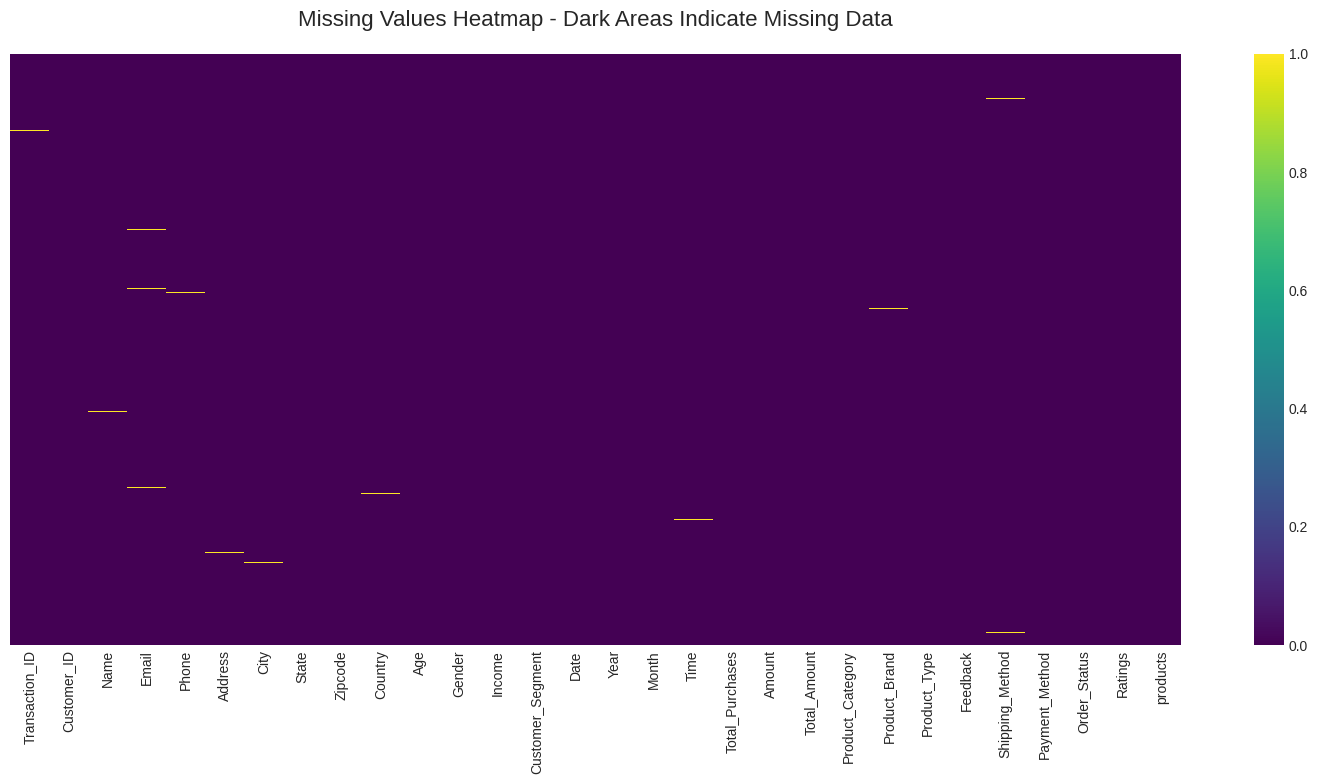


DUPLICATE RECORDS: 4

DATA TYPES BREAKDOWN:
-------------------------
object: 20 columns
float64: 10 columns


In [17]:
# Missing Values Analysis
def analyze_missing_values(df):
    """Comprehensive missing values analysis"""
    missing_data = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
    return missing_data

missing_analysis = analyze_missing_values(df)

print("MISSING VALUES REPORT")
print("=" * 45)
if len(missing_analysis) > 0:
    display(missing_analysis)

    # Visualize missing values heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap - Dark Areas Indicate Missing Data', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

    # Missing values bar chart
    if len(missing_analysis) <= 20:
        plt.figure(figsize=(12, 6))
        sns.barplot(data=missing_analysis.head(10), x='Missing_Percentage', y='Column', palette='rocket')
        plt.title('Top 10 Columns with Missing Values', fontsize=14)
        plt.xlabel('Missing Percentage (%)')
        plt.tight_layout()
        plt.show()
else:
    print("No missing values detected in the dataset!")

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDUPLICATE RECORDS: {duplicate_count:,}")

# Data types analysis
print(f"\nDATA TYPES BREAKDOWN:")
print("-" * 25)
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"{dtype}: {count} columns")

## 🛠️ Data Cleaning and Preprocessing

In [18]:
# Create a copy for cleaning operations
df_clean = df.copy()

# 1. Handle duplicates
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
removed_dupes = initial_rows - len(df_clean)
print(f"Removed {removed_dupes:,} duplicate records")

# 2. Fix data types - Convert dates
date_columns = ['Date']
for col in date_columns:
    if col in df_clean.columns:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
        print(f"Converted {col} to datetime format")

# 3. Clean and standardize categorical variables
categorical_cols = ['Gender', 'Customer_Segment', 'Product_Category', 'Product_Brand',
                   'Shipping_Method', 'Payment_Method', 'Order_Status', 'Country', 'State']

for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype(str).str.strip().str.title()

# 4. Handle missing values strategically

# For categorical variables - fill with 'Unknown' or mode
for col in categorical_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        if df_clean[col].isnull().sum() / len(df_clean) < 0.05:
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
            print(f"✓ Filled {col} missing values with mode")
        else:
            df_clean[col] = df_clean[col].fillna('Unknown')
            print(f"✓ Filled {col} missing values with 'Unknown'")

# For numerical variables - handle based on distribution
numerical_cols = ['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']
for col in numerical_cols:
    if col in df_clean.columns and df_clean[col].isnull().sum() > 0:
        # Use median for skewed distributions, mean for normal distributions
        skewness = df_clean[col].skew()
        if abs(skewness) > 1:
            fill_value = df_clean[col].median()
            method = "median"
        else:
            fill_value = df_clean[col].mean()
            method = "mean"

        df_clean[col] = df_clean[col].fillna(fill_value)
        print(f"✓ Filled {col} missing values with {method}")

# 5. Handle outliers in critical numerical columns
def remove_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    initial_count = len(df)
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    removed_count = initial_count - len(df_filtered)

    return df_filtered, removed_count

# Apply outlier removal to Amount and Total_Amount
outlier_cols = ['Amount', 'Total_Amount']
total_outliers_removed = 0

for col in outlier_cols:
    if col in df_clean.columns:
        df_clean, removed = remove_outliers_iqr(df_clean, col, factor=2.0)  # Less aggressive
        total_outliers_removed += removed
        print(f"Removed {removed:,} outliers from {col}")

print(f"\nCLEANING COMPLETE!")
print(f"Final dataset: {len(df_clean):,} rows × {len(df_clean.columns)} columns")
print(f"Total records removed: {len(df) - len(df_clean):,}")

Removed 4 duplicate records
Converted Date to datetime format
✓ Filled Age missing values with mean
✓ Filled Total_Purchases missing values with mean
✓ Filled Amount missing values with mean
✓ Filled Total_Amount missing values with mean
✓ Filled Ratings missing values with mean
Removed 0 outliers from Amount
Removed 0 outliers from Total_Amount

CLEANING COMPLETE!
Final dataset: 302,006 rows × 30 columns
Total records removed: 4


## ⚙️ New Features and Derived Metrics

Creating powerful business intelligence features that will give us advantage in our analysis.

In [19]:
# 1. Age Groups - Strategic demographic segmentation
def categorize_age(age):
    if age < 25:
        return 'Gen Z (18-24)'
    elif age < 35:
        return 'Millennials (25-34)'
    elif age < 45:
        return 'Gen X (35-44)'
    elif age < 55:
        return 'Baby Boomers (45-54)'
    else:
        return 'Seniors (55+)'

df_clean['Age_Group'] = df_clean['Age'].apply(categorize_age)
print("✓ Created Age_Group segmentation")

# 2. Income Categories - Financial segmentation
def categorize_income(income_str):
    if income_str == 'Low':
        return 'Budget Conscious ($0-30K)'
    elif income_str == 'Medium':
        return 'Middle Class ($30K-60K)'
    else:  # High
        return 'Affluent ($60K+)'

df_clean['Income_Category'] = df_clean['Income'].apply(categorize_income)
print("✓ Created Income_Category classification")

# 3. Revenue per Purchase - Purchase efficiency metric
df_clean['Revenue_Per_Purchase'] = df_clean['Total_Amount'] / df_clean['Total_Purchases']
print("✓ Calculated Revenue_Per_Purchase ratio")

# 4. Customer Lifetime Value Proxy
df_clean['CLV_Proxy'] = df_clean['Total_Purchases'] * df_clean['Revenue_Per_Purchase']
print("✓ Created CLV_Proxy (Customer Lifetime Value indicator)")

# 5. Loyalty Index - Frequency × Spend behavior
df_clean['Loyalty_Index'] = df_clean['Total_Purchases'] * np.log1p(df_clean['Total_Amount'])
print("✓ Developed Loyalty_Index metric")

# 6. Purchase Frequency Tier
df_clean['Purchase_Frequency_Tier'] = pd.cut(df_clean['Total_Purchases'],
                                           bins=[0, 2, 5, 10, float('inf')],
                                           labels=['Occasional (1-2)', 'Regular (3-5)',
                                                  'Frequent (6-10)', 'VIP (10+)'])
print("✓ Created Purchase_Frequency_Tier categories")

# 7. Spending Behavior Classification
spending_percentiles = df_clean['Total_Amount'].quantile([0.25, 0.5, 0.75, 0.9])
def classify_spending(amount):
    if amount <= spending_percentiles[0.25]:
        return 'Light Spender'
    elif amount <= spending_percentiles[0.5]:
        return 'Moderate Spender'
    elif amount <= spending_percentiles[0.75]:
        return 'Heavy Spender'
    elif amount <= spending_percentiles[0.9]:
        return 'Premium Spender'
    else:
        return 'VIP Spender'

df_clean['Spending_Behavior'] = df_clean['Total_Amount'].apply(classify_spending)
print("✓ Classified Spending_Behavior patterns")

# 8. Seasonal Purchase Indicator (if date available)
if 'Date' in df_clean.columns:
    df_clean['Season'] = df_clean['Date'].dt.month.map({
        12: 'Winter', 1: 'Winter', 2: 'Winter',
        3: 'Spring', 4: 'Spring', 5: 'Spring',
        6: 'Summer', 7: 'Summer', 8: 'Summer',
        9: 'Fall', 10: 'Fall', 11: 'Fall'
    })
    df_clean['Purchase_Day'] = df_clean['Date'].dt.day_name()
    df_clean['Purchase_Month'] = df_clean['Date'].dt.strftime('%B')
    print("✓ Created seasonal and temporal features")

# 9. Product Engagement Score
df_clean['Product_Engagement_Score'] = (
    df_clean['Ratings'] * df_clean['Total_Purchases'] *
    np.log1p(df_clean['Total_Amount'])
)
print("✓ Calculated Product_Engagement_Score")

# 10. Geographic Region Grouping
region_mapping = {
    'Germany': 'Europe', 'UK': 'Europe', 'France': 'Europe', 'Italy': 'Europe',
    'USA': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
    'Japan': 'Asia', 'China': 'Asia', 'India': 'Asia', 'South Korea': 'Asia'
}

df_clean['Region'] = df_clean['Country'].map(region_mapping).fillna('Other')
print("✓ Grouped countries into geographic regions")


print(f"Enhanced dataset: {len(df_clean.columns)} features (added {len(df_clean.columns) - len(df.columns)} new features)")

# Display new features summary
new_features = ['Age_Group', 'Income_Category', 'Revenue_Per_Purchase', 'CLV_Proxy',
               'Loyalty_Index', 'Purchase_Frequency_Tier', 'Spending_Behavior',
               'Product_Engagement_Score', 'Region']

print(f"\nNEW FEATURES:")
print("-" * 30)
for feature in new_features:
    if feature in df_clean.columns:
        print(f"✓ {feature}")

print(f"\nSAMPLE OF ENHANCED DATA:")
display(df_clean[['Customer_ID', 'Age_Group', 'Income_Category', 'Revenue_Per_Purchase',
                 'Loyalty_Index', 'Spending_Behavior']].head())

✓ Created Age_Group segmentation
✓ Created Income_Category classification
✓ Calculated Revenue_Per_Purchase ratio
✓ Created CLV_Proxy (Customer Lifetime Value indicator)
✓ Developed Loyalty_Index metric
✓ Created Purchase_Frequency_Tier categories
✓ Classified Spending_Behavior patterns
✓ Created seasonal and temporal features
✓ Calculated Product_Engagement_Score
✓ Grouped countries into geographic regions
Enhanced dataset: 42 features (added 12 new features)

NEW FEATURES:
------------------------------
✓ Age_Group
✓ Income_Category
✓ Revenue_Per_Purchase
✓ CLV_Proxy
✓ Loyalty_Index
✓ Purchase_Frequency_Tier
✓ Spending_Behavior
✓ Product_Engagement_Score
✓ Region

SAMPLE OF ENHANCED DATA:


,Customer_ID,Age_Group,Income_Category,Revenue_Per_Purchase,Loyalty_Index,Spending_Behavior
0,37249.0,Gen Z (18-24),Budget Conscious ($0-30K),108.028757,17.352272,Light Spender
1,69749.0,Gen Z (18-24),Budget Conscious ($0-30K),403.353907,13.388401,Moderate Spender
2,30192.0,Baby Boomers (45-54),Budget Conscious ($0-30K),354.477600,20.910592,Heavy Spender
3,62101.0,Seniors (55+),Affluent ($60K+),352.407717,54.677730,Premium Spender
4,27901.0,Gen Z (18-24),Budget Conscious ($0-30K),124.276525,11.039343,Light Spender


## 📊 Univariate Analysis - Numerical Variables

Deep-dive analysis of numerical distributions to understand customer spending patterns and behavior.

NUMERICAL VARIABLES ANALYSIS


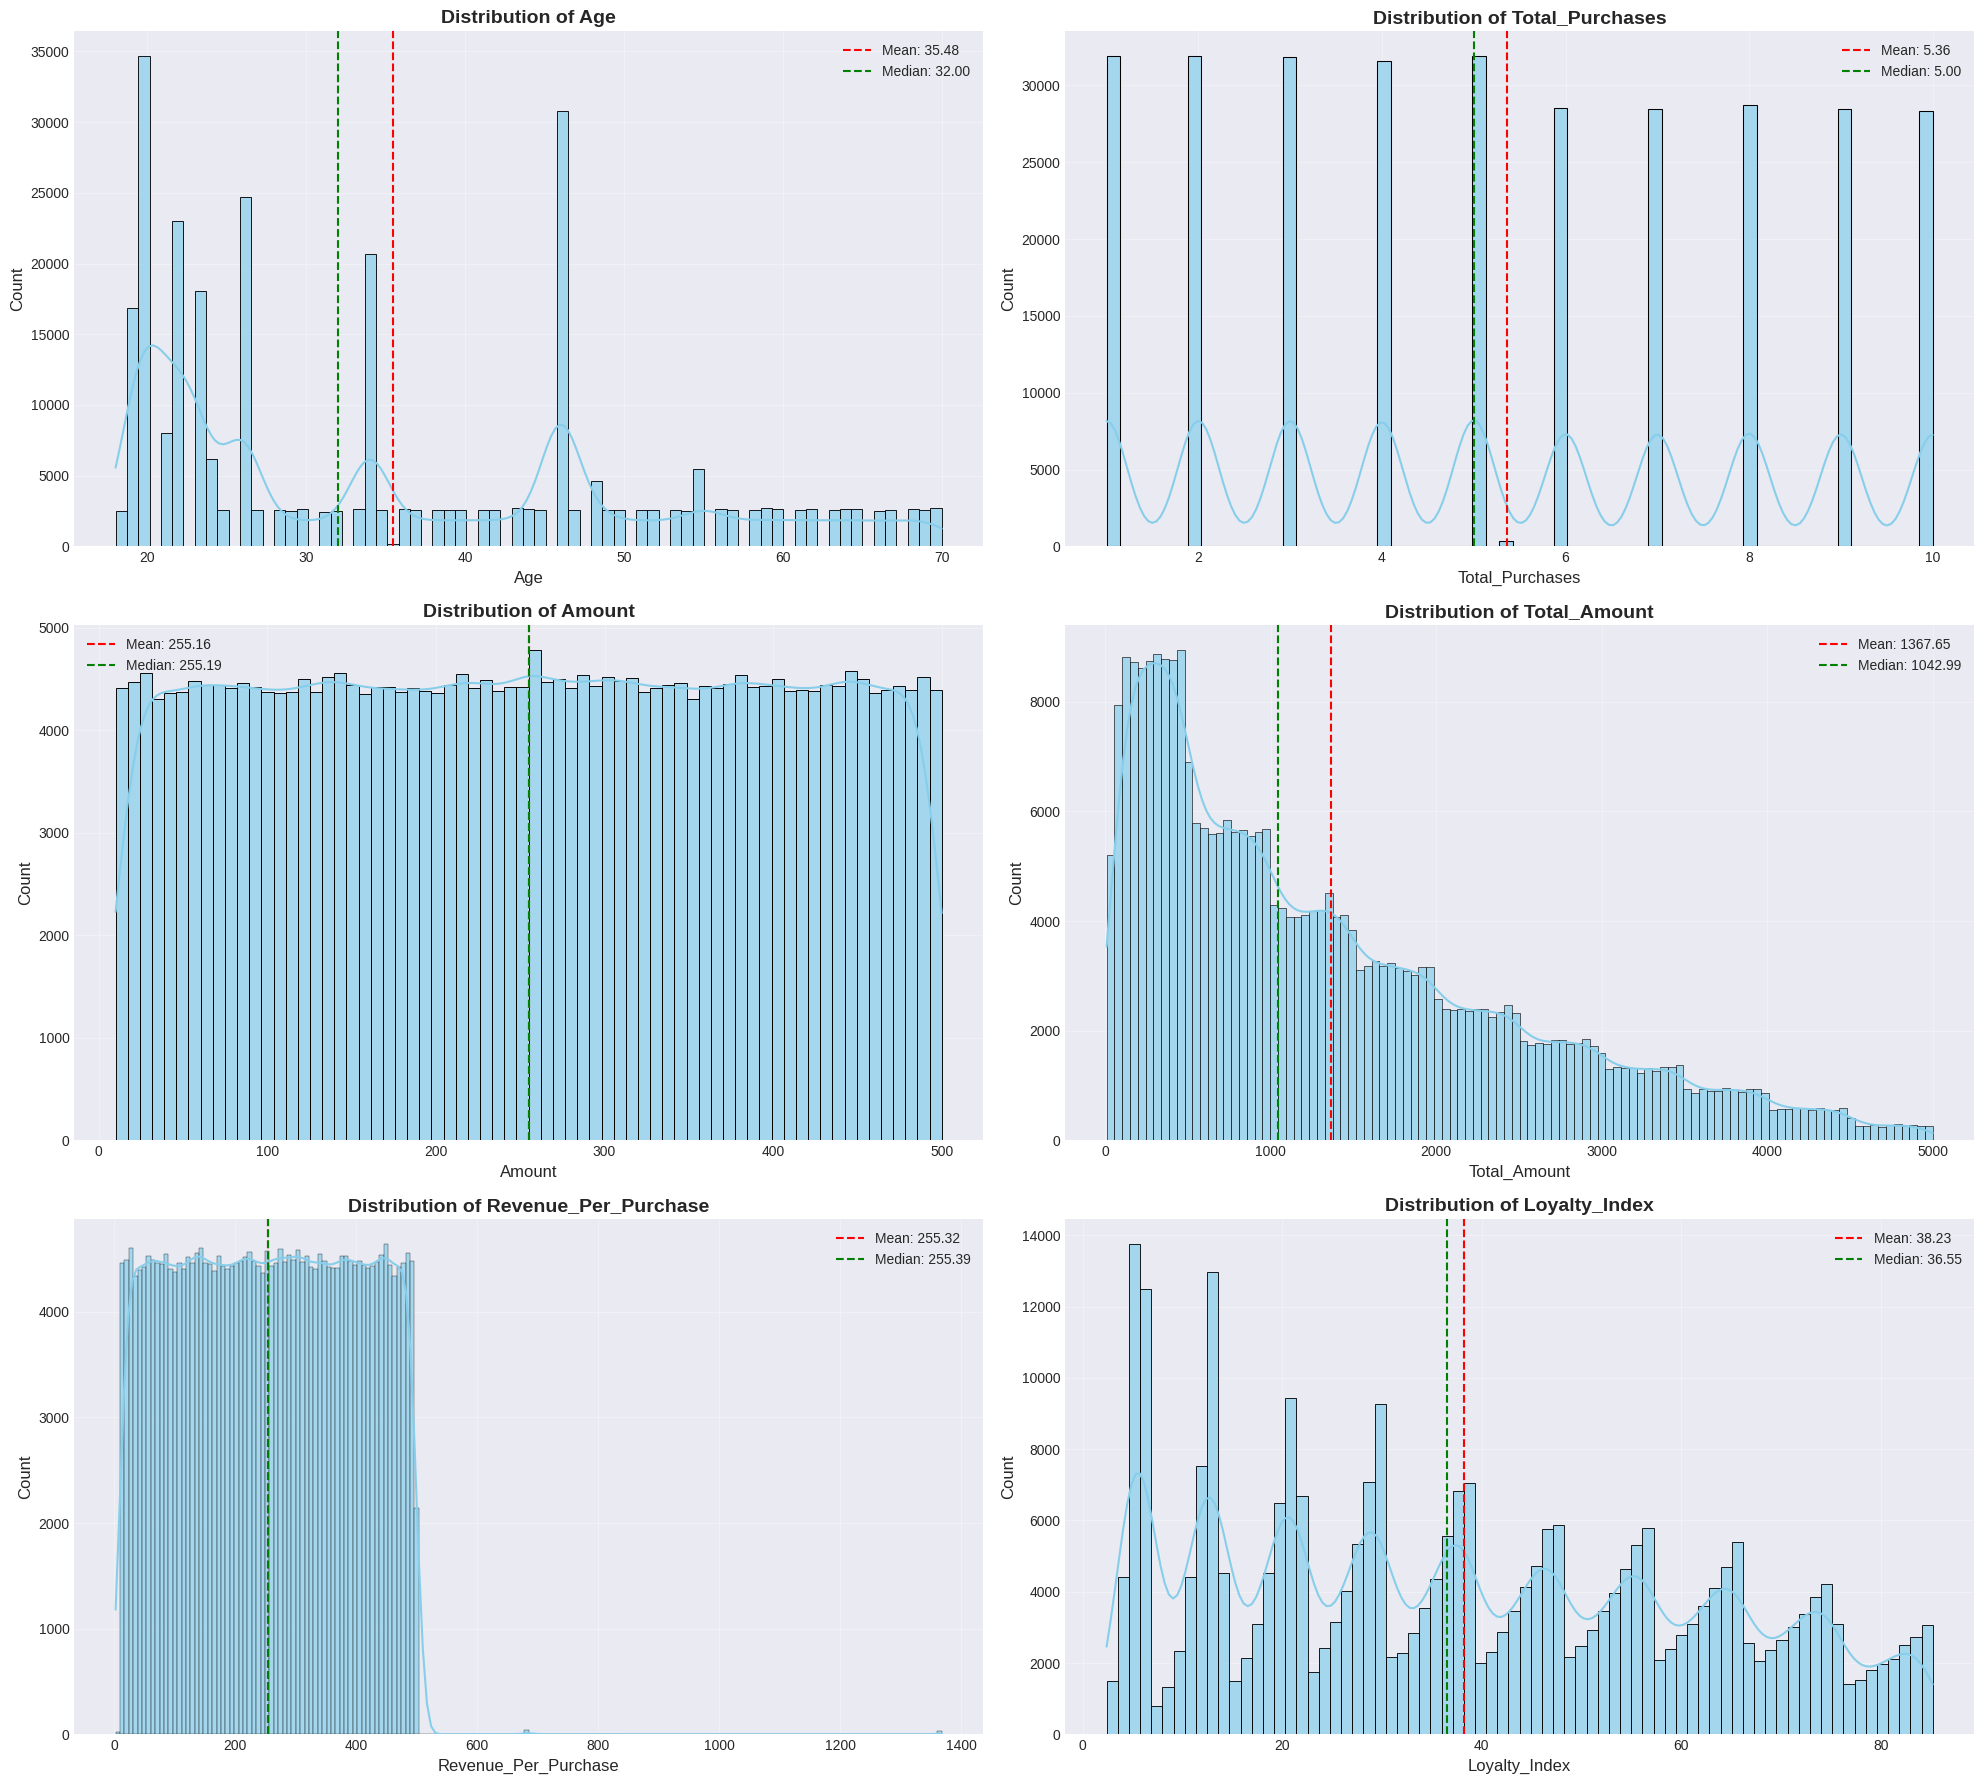

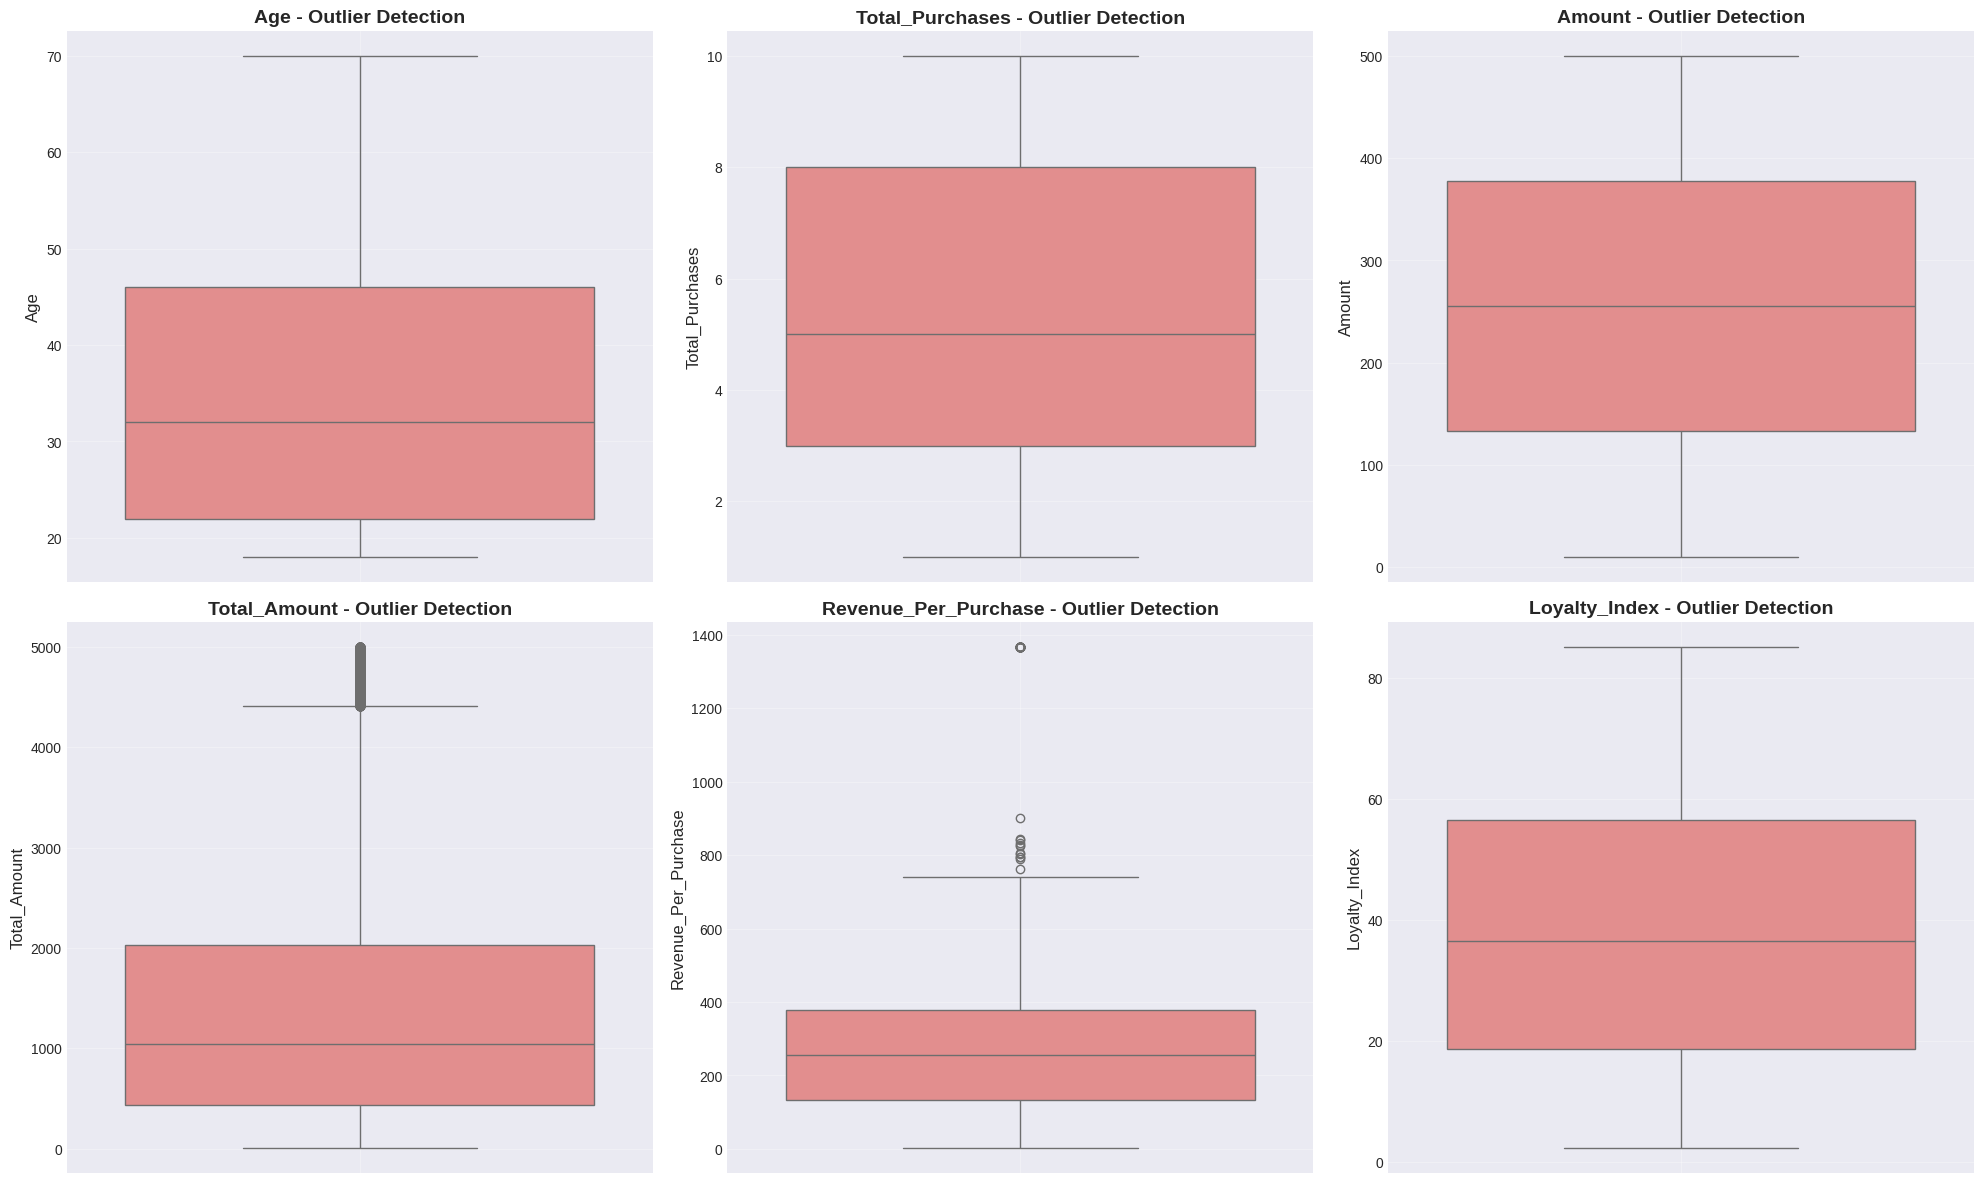


STATISTICAL INSIGHTS:
-------------------------

AGE:
   Mean: 35.48
   Median: 32.00
   Std Dev: 15.02
   Skewness: 0.65
   Kurtosis: -0.81
   Min: 18.00
   Max: 70.00
Distribution: Moderately skewed

TOTAL_PURCHASES:
   Mean: 5.36
   Median: 5.00
   Std Dev: 2.87
   Skewness: 0.07
   Kurtosis: -1.21
   Min: 1.00
   Max: 10.00
Distribution: Approximately normal

AMOUNT:
   Mean: 255.16
   Median: 255.19
   Std Dev: 141.31
   Skewness: -0.00
   Kurtosis: -1.20
   Min: 10.00
   Max: 500.00
Distribution: Approximately normal

TOTAL_AMOUNT:
   Mean: 1367.65
   Median: 1042.99
   Std Dev: 1128.35
   Skewness: 0.97
   Kurtosis: 0.18
   Min: 10.00
   Max: 4999.63
Distribution: Moderately skewed

REVENUE_PER_PURCHASE:
   Mean: 255.32
   Median: 255.39
   Std Dev: 142.05
   Skewness: 0.06
   Kurtosis: -0.76
   Min: 2.77
   Max: 1367.65
Distribution: Approximately normal

LOYALTY_INDEX:
   Mean: 38.23
   Median: 36.55
   Std Dev: 23.19
   Skewness: 0.25
   Kurtosis: -1.08
   Min: 2.40
   Max: 

In [20]:
# Numerical Variables Analysis
numerical_vars = ['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Revenue_Per_Purchase', 'Loyalty_Index']

print("NUMERICAL VARIABLES ANALYSIS")
print("=" * 35)

# Create comprehensive numerical analysis dashboard
fig, axes = plt.subplots(3, 2, figsize=(20, 18))
axes = axes.ravel()

for i, var in enumerate(numerical_vars):
    if var in df_clean.columns:
        # Histogram with KDE
        sns.histplot(data=df_clean, x=var, kde=True, ax=axes[i], color='skyblue', alpha=0.7)
        axes[i].axvline(df_clean[var].mean(), color='red', linestyle='--', label=f'Mean: {df_clean[var].mean():.2f}')
        axes[i].axvline(df_clean[var].median(), color='green', linestyle='--', label=f'Median: {df_clean[var].median():.2f}')
        axes[i].set_title(f'Distribution of {var}', fontsize=14, fontweight='bold')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, var in enumerate(numerical_vars):
    if var in df_clean.columns:
        sns.boxplot(data=df_clean, y=var, ax=axes[i], color='lightcoral')
        axes[i].set_title(f'{var} - Outlier Detection', fontsize=14, fontweight='bold')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical Summary
print("\nSTATISTICAL INSIGHTS:")
print("-" * 25)
for var in numerical_vars:
    if var in df_clean.columns:
        stats_summary = {
            'Mean': df_clean[var].mean(),
            'Median': df_clean[var].median(),
            'Std Dev': df_clean[var].std(),
            'Skewness': df_clean[var].skew(),
            'Kurtosis': df_clean[var].kurtosis(),
            'Min': df_clean[var].min(),
            'Max': df_clean[var].max()
        }

        print(f"\n{var.upper()}:")
        for stat, value in stats_summary.items():
            print(f"   {stat}: {value:.2f}")

        # Interpretation
        if abs(stats_summary['Skewness']) > 1:
            skew_interpretation = "Highly skewed"
        elif abs(stats_summary['Skewness']) > 0.5:
            skew_interpretation = "Moderately skewed"
        else:
            skew_interpretation = "Approximately normal"

        print(f"Distribution: {skew_interpretation}")

print(f"\nKEY NUMERICAL INSIGHTS:")
print("-" * 30)
print(f"Average Customer Age: {df_clean['Age'].mean():.1f} years")
print(f"Average Purchases per Customer: {df_clean['Total_Purchases'].mean():.1f}")
print(f"Average Transaction Amount: ${df_clean['Amount'].mean():.2f}")
print(f"Average Total Customer Value: ${df_clean['Total_Amount'].mean():.2f}")
print(f"Average Revenue per Purchase: ${df_clean['Revenue_Per_Purchase'].mean():.2f}")

## 📊 Univariate Analysis - Categorical Variables

Strategic analysis of categorical variables to identify market segments and business opportunities.

CATEGORICAL VARIABLES MARKET ANALYSIS


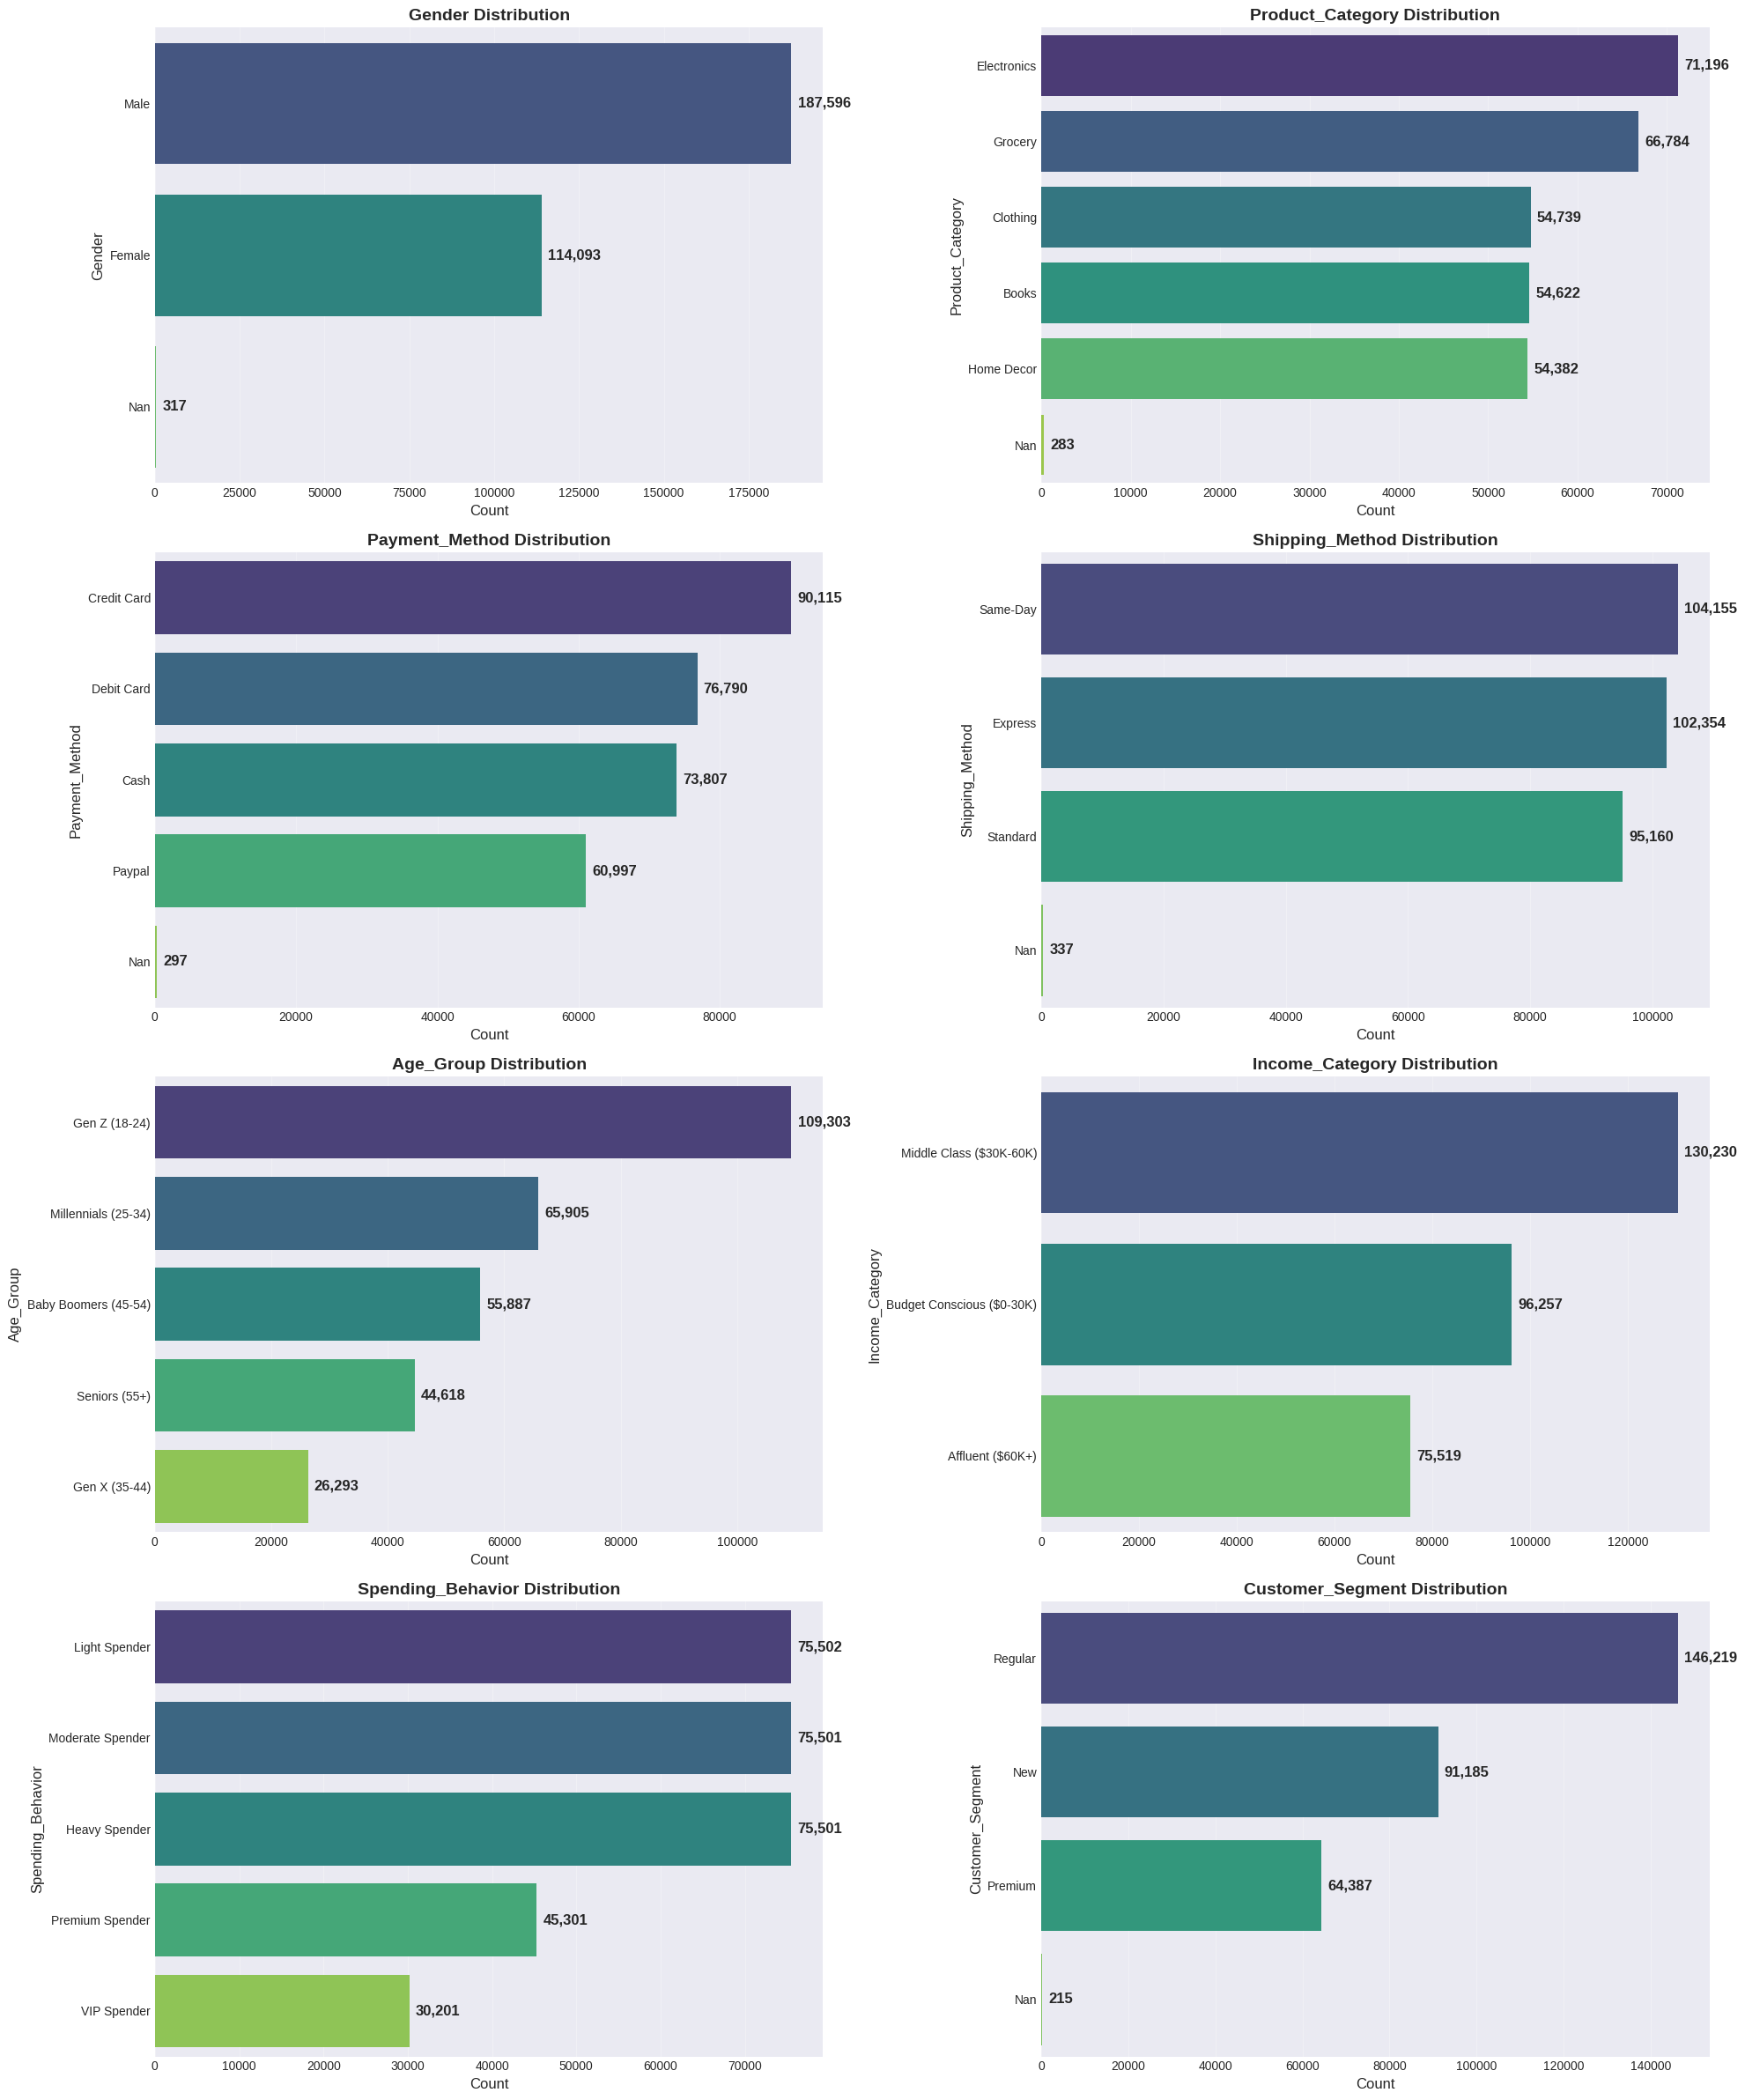

DETAILED CATEGORICAL BREAKDOWN:

GENDER:
--------------------
   Male: 187,596 (62.12%)
   Female: 114,093 (37.78%)
   Nan: 317 (0.1%)

PRODUCT_CATEGORY:
--------------------
   Electronics: 71,196 (23.57%)
   Grocery: 66,784 (22.11%)
   Clothing: 54,739 (18.13%)
   Books: 54,622 (18.09%)
   Home Decor: 54,382 (18.01%)
   Others: 283 (0.09%)

PAYMENT_METHOD:
--------------------
   Credit Card: 90,115 (29.84%)
   Debit Card: 76,790 (25.43%)
   Cash: 73,807 (24.44%)
   Paypal: 60,997 (20.2%)
   Nan: 297 (0.1%)

SHIPPING_METHOD:
--------------------
   Same-Day: 104,155 (34.49%)
   Express: 102,354 (33.89%)
   Standard: 95,160 (31.51%)
   Nan: 337 (0.11%)

AGE_GROUP:
--------------------
   Gen Z (18-24): 109,303 (36.19%)
   Millennials (25-34): 65,905 (21.82%)
   Baby Boomers (45-54): 55,887 (18.51%)
   Seniors (55+): 44,618 (14.77%)
   Gen X (35-44): 26,293 (8.71%)

INCOME_CATEGORY:
--------------------
   Middle Class ($30K-60K): 130,230 (43.12%)
   Budget Conscious ($0-30K): 96,257 (

In [21]:
# Categorical Variables Analysis
categorical_vars = ['Gender', 'Product_Category', 'Payment_Method', 'Shipping_Method',
                   'Age_Group', 'Income_Category', 'Spending_Behavior', 'Customer_Segment']

print("CATEGORICAL VARIABLES MARKET ANALYSIS")
print("=" * 50)

# Create comprehensive categorical analysis dashboard
fig, axes = plt.subplots(4, 2, figsize=(20, 24))
axes = axes.ravel()

for i, var in enumerate(categorical_vars):
    if var in df_clean.columns and i < len(axes):
        # Get top categories (limit to prevent overcrowding)
        value_counts = df_clean[var].value_counts().head(10)

        # Create horizontal bar plot for better readability
        sns.barplot(x=value_counts.values, y=value_counts.index, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{var} Distribution', fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Count')

        # Add value labels on bars
        for j, v in enumerate(value_counts.values):
            axes[i].text(v + max(value_counts.values) * 0.01, j, f'{v:,}',
                        va='center', fontweight='bold')

        axes[i].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Detailed breakdown with percentages
print("DETAILED CATEGORICAL BREAKDOWN:")
print("=" * 40)

for var in categorical_vars:
    if var in df_clean.columns:
        print(f"\n{var.upper()}:")
        print("-" * 20)

        value_counts = df_clean[var].value_counts()
        percentages = (value_counts / len(df_clean) * 100).round(2)

        for category, count in value_counts.head(5).items():
            percentage = percentages[category]
            print(f"   {category}: {count:,} ({percentage}%)")

        if len(value_counts) > 5:
            others_count = value_counts.iloc[5:].sum()
            others_percentage = (others_count / len(df_clean) * 100).round(2)
            print(f"   Others: {others_count:,} ({others_percentage}%)")

# Business Intelligence Insights
print(f"\nSTRATEGIC CATEGORICAL INSIGHTS:")
print("=" * 40)

# Gender distribution
if 'Gender' in df_clean.columns:
    gender_dist = df_clean['Gender'].value_counts(normalize=True) * 100
    print(f"Gender Split: {gender_dist.to_dict()}")

# Top product categories
if 'Product_Category' in df_clean.columns:
    top_categories = df_clean['Product_Category'].value_counts().head(3)
    print(f"Top 3 Product Categories: {list(top_categories.index)}")

# Payment method preferences
if 'Payment_Method' in df_clean.columns:
    payment_pref = df_clean['Payment_Method'].value_counts().head(1)
    print(f"Most Popular Payment Method: {payment_pref.index[0]} ({payment_pref.values[0]:,} customers)")

# Shipping preferences
if 'Shipping_Method' in df_clean.columns:
    shipping_pref = df_clean['Shipping_Method'].value_counts().head(1)
    print(f"Preferred Shipping Method: {shipping_pref.index[0]} ({shipping_pref.values[0]:,} orders)")

# Age group insights
if 'Age_Group' in df_clean.columns:
    dominant_age = df_clean['Age_Group'].value_counts().head(1)
    print(f"Dominant Age Segment: {dominant_age.index[0]} ({dominant_age.values[0]:,} customers)")

# Customer segment distribution
if 'Customer_Segment' in df_clean.columns:
    segment_dist = df_clean['Customer_Segment'].value_counts()
    print(f"Customer Segments: {dict(segment_dist)}")



## 👥 Customer Segmentation Analysis

Advanced customer behavior analysis to identify high-value segments and optimize targeting strategies.

CUSTOMER SEGMENTATION INTELLIGENCE


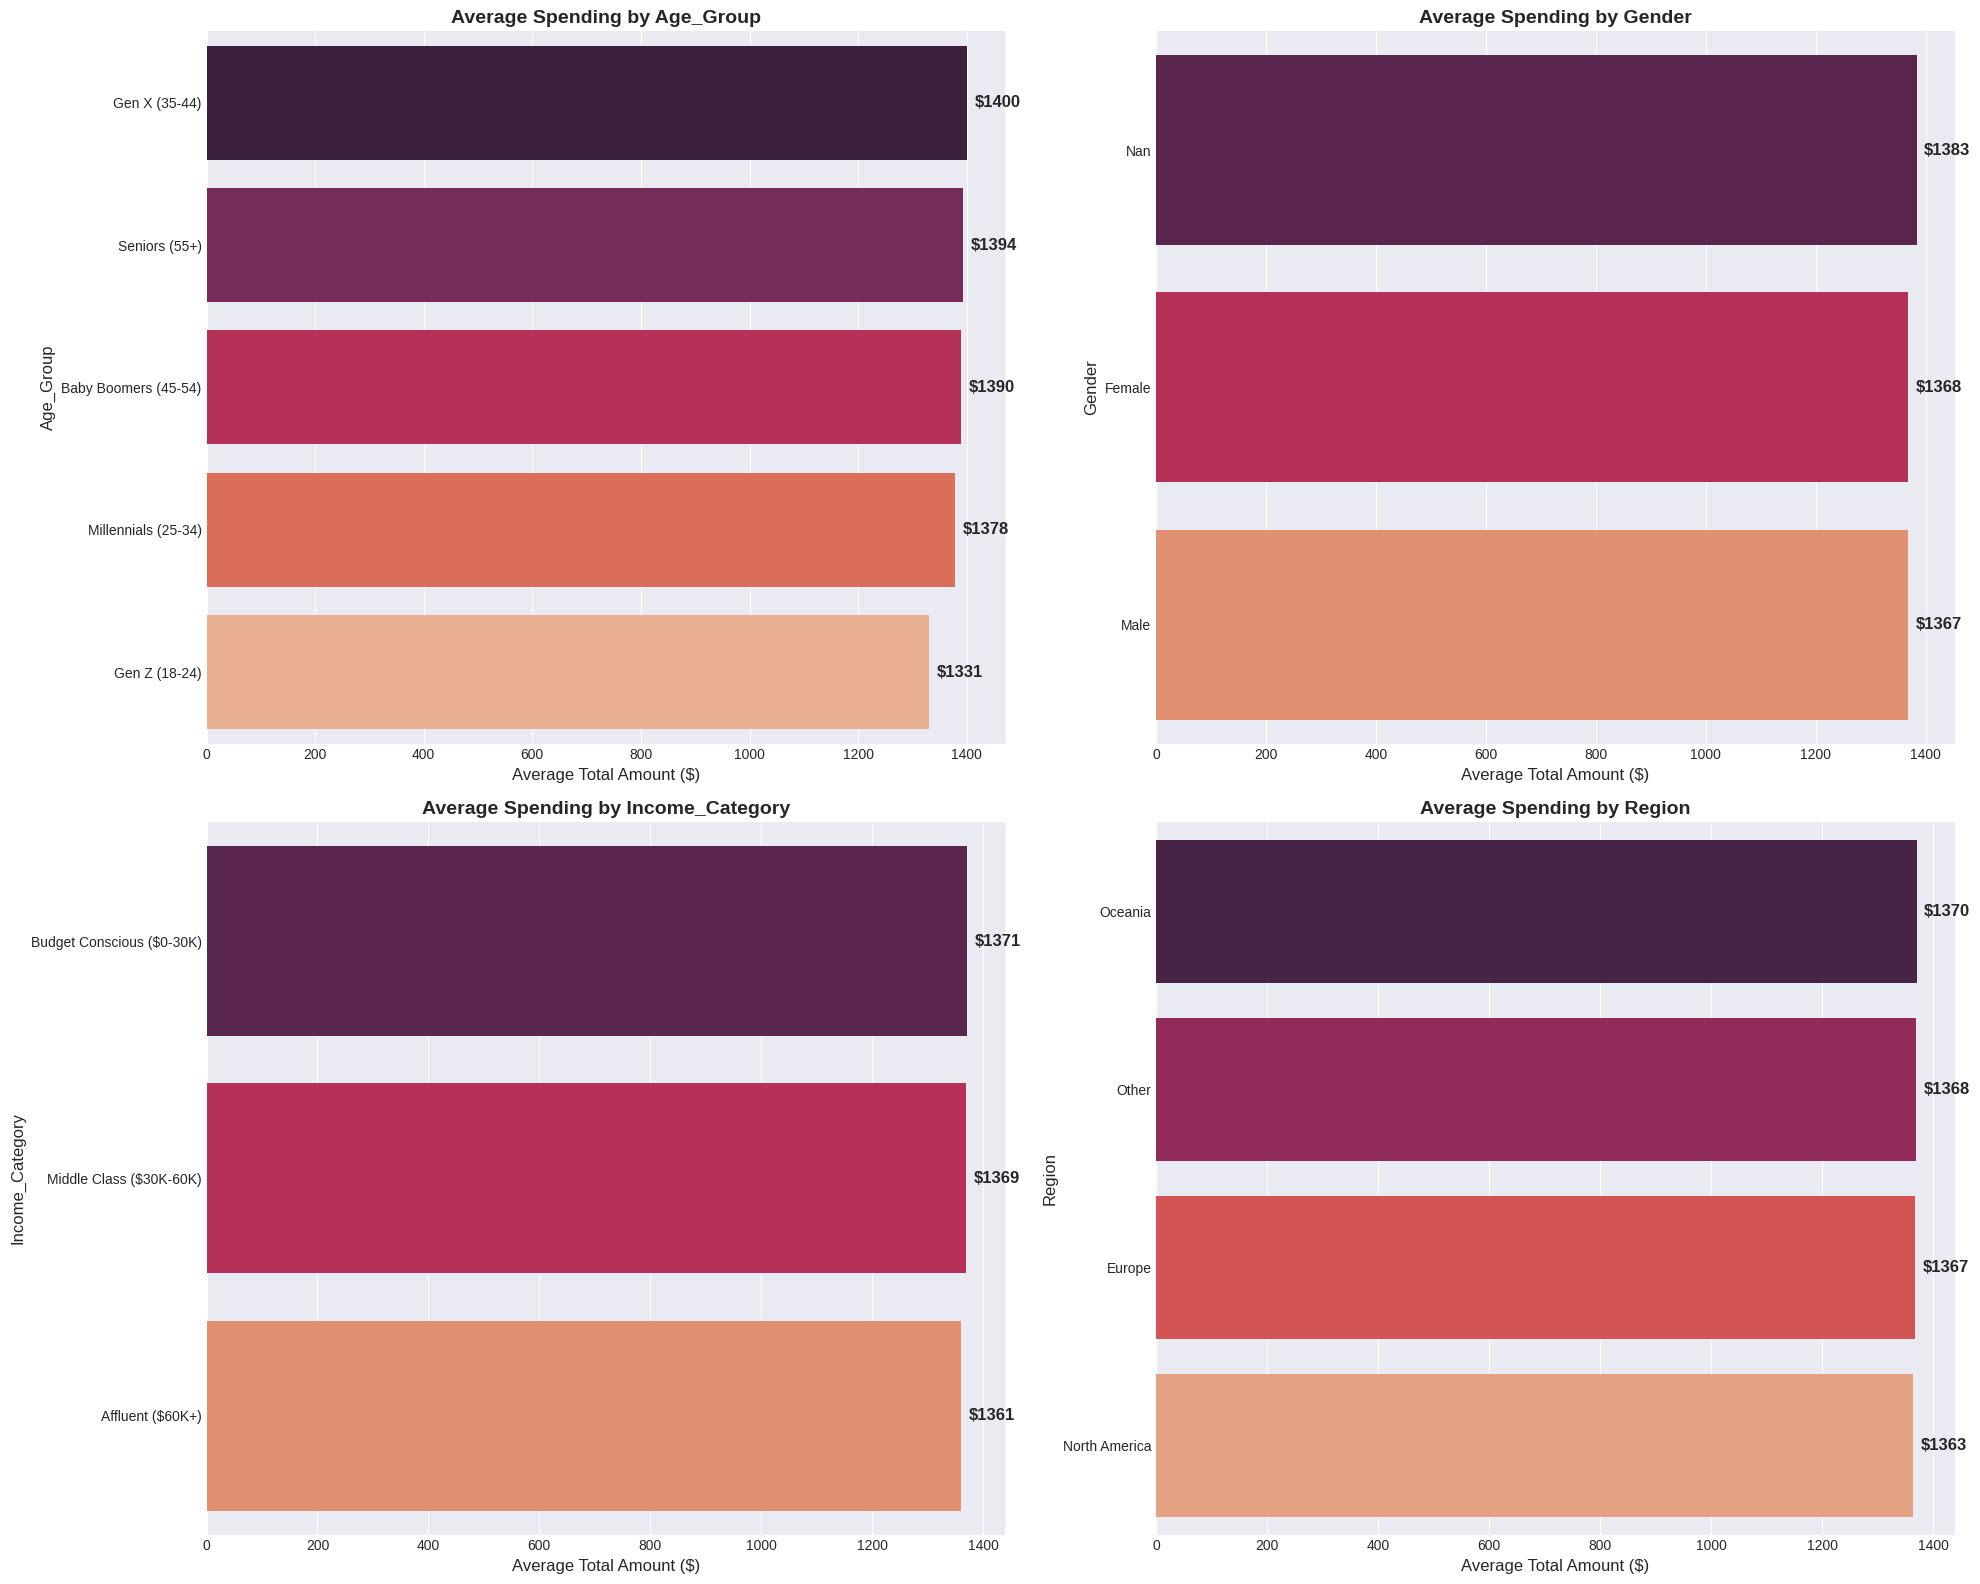


LOYALTY ANALYSIS:
--------------------


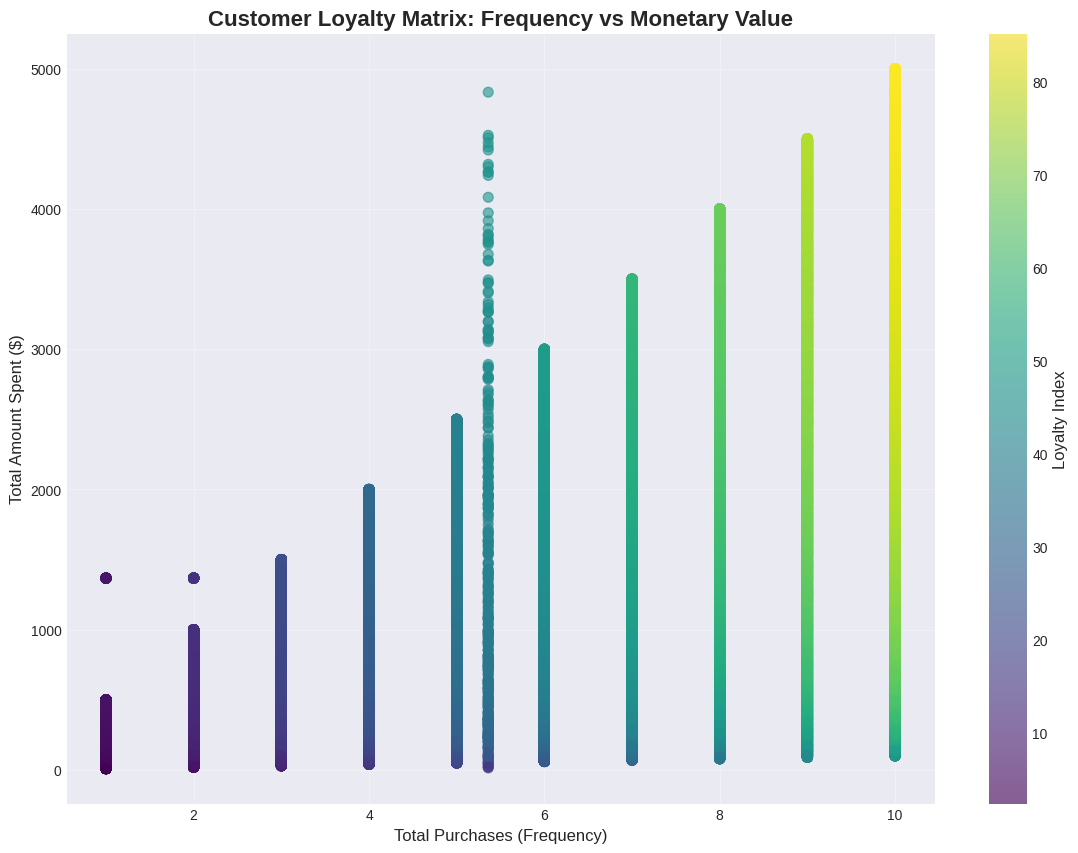


TOP CUSTOMER SEGMENTS BY REVENUE:
---------------------------------------------


Customer_Count  \
Age_Group            Income_Category                             
Gen Z (18-24)        Middle Class ($30K-60K)             54319   
                     Affluent ($60K+)                    29719   
                     Budget Conscious ($0-30K)           25141   
Baby Boomers (45-54) Middle Class ($30K-60K)             22816   
Millennials (25-34)  Middle Class ($30K-60K)             22959   
Baby Boomers (45-54) Budget Conscious ($0-30K)           22077   
Millennials (25-34)  Budget Conscious ($0-30K)           21824   
                     Affluent ($60K+)                    21064   
Seniors (55+)        Middle Class ($30K-60K)             18810   
                     Budget Conscious ($0-30K)           17028   

                                                Avg_Total_Amount  \
Age_Group            Income_Category                               
Gen Z (18-24)        Middle Class ($30K-60K)             1337.33   
                     Affluent ($60K+)                    1337.25   
                     Budget Conscious ($0-30K)           1311.33   
Baby Boomers (45-54) Middle Class ($30K-60K)             1398.98   
Millennials (25-34)  Middle Class ($30K-60K)             1386.82   
Baby Boomers (45-54) Budget Conscious ($0-30K)           1385.19   
Millennials (25-34)  Budget Conscious ($0-30K)           1383.11   
                     Affluent ($60K+)                    1362.71   
Seniors (55+)        Middle Class ($30K-60K)             1390.56   
                     Budget Conscious ($0-30K)           1399.36   

                                                Total_Revenue  Avg_Purchases  \
Age_Group            Income_Category                                           
Gen Z (18-24)        Middle Class ($30K-60K)      72716214.22           5.25   
                     Affluent ($60K+)             39785765.24           5.25   
                     Budget Conscious ($0-30K)    33015308.69           5.13   
Baby Boomers (45-54) Middle Class ($30K-60K)      31947093.38           5.46   
Millennials (25-34)  Middle Class ($30K-60K)      31873349.59           5.43   
Baby Boomers (45-54) Budget Conscious ($0-30K)    30609962.65           5.42   
Millennials (25-34)  Budget Conscious ($0-30K)    30207195.46           5.43   
                     Affluent ($60K+)             28728615.14           5.36   
Seniors (55+)        Middle Class ($30K-60K)      26187047.67           5.46   
                     Budget Conscious ($0-30K)    23861910.72           5.46   

                                                Avg_Revenue_Per_Purchase  \
Age_Group            Income_Category                                       
Gen Z (18-24)        Middle Class ($30K-60K)                      254.69   
                     Affluent ($60K+)                             256.02   
                     Budget Conscious ($0-30K)                    255.41   
Baby Boomers (45-54) Middle Class ($30K-60K)                      255.52   
Millennials (25-34)  Middle Class ($30K-60K)                      255.62   
Baby Boomers (45-54) Budget Conscious ($0-30K)                    255.93   
Millennials (25-34)  Budget Conscious ($0-30K)                    254.98   
                     Affluent ($60K+)                             254.62   
Seniors (55+)        Middle Class ($30K-60K)                      254.76   
                     Budget Conscious ($0-30K)                    256.49   

                                                Avg_Loyalty_Index  
Age_Group            Income_Category                               
Gen Z (18-24)        Middle Class ($30K-60K)                37.34  
                     Affluent ($60K+)                       37.35  
                     Budget Conscious ($0-30K)              36.44  
Baby Boomers (45-54) Middle Class ($30K-60K)                39.07  
Millennials (25-34)  Middle Class ($30K-60K)                38.80  
Baby Boomers (45-54) Budget Conscious ($0-30K)              38.71  
Millennials (25-34) 

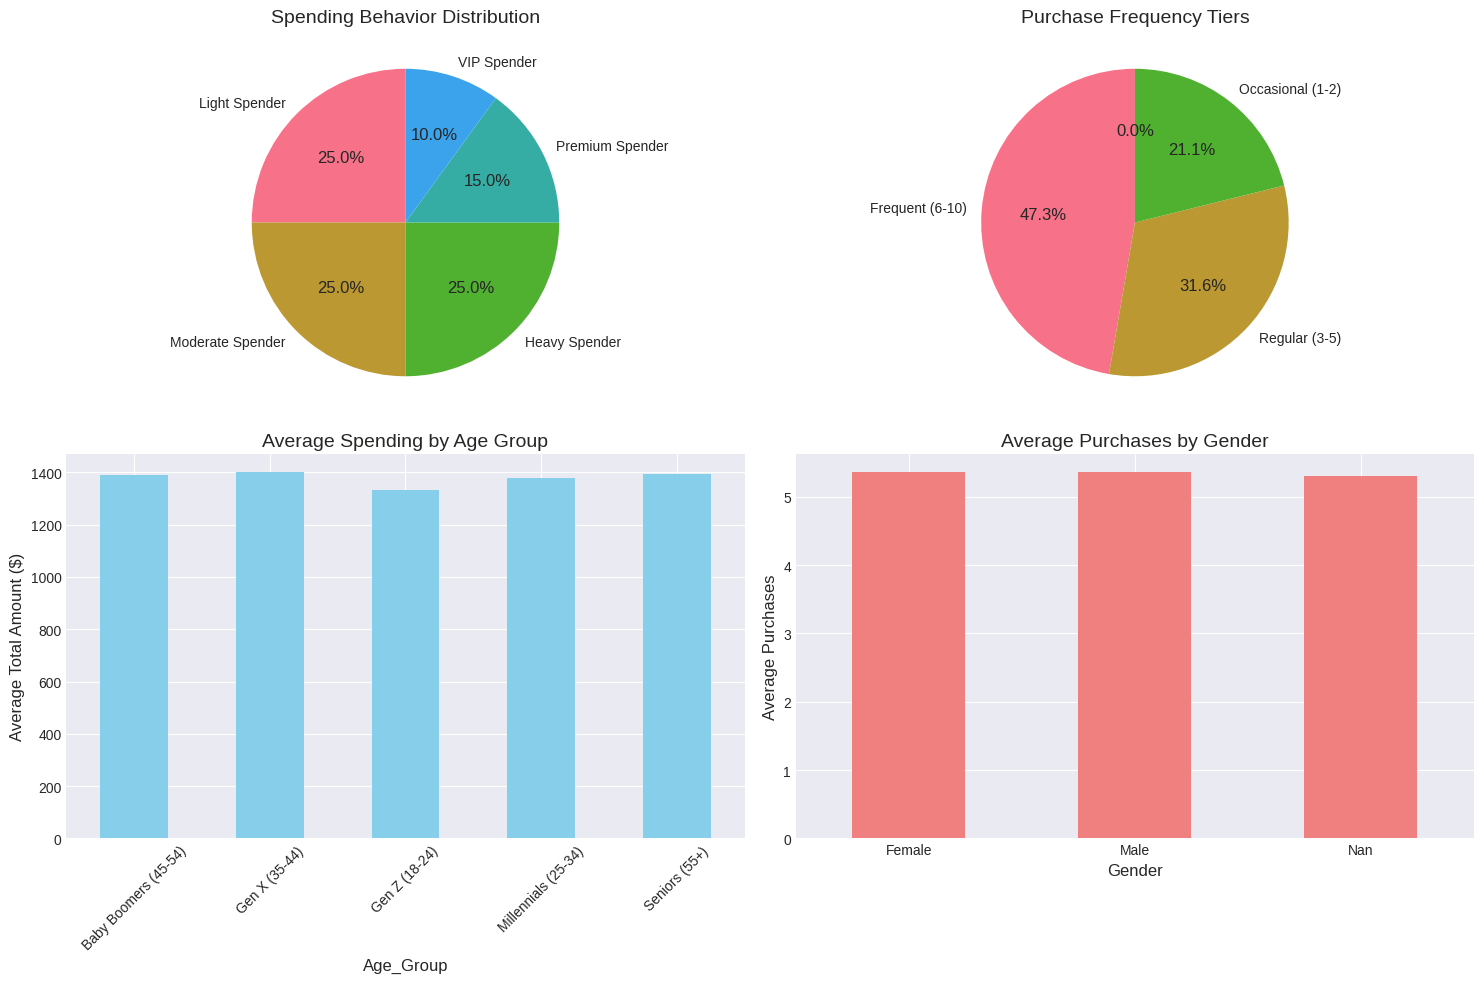


CUSTOMER SEGMENTATION INSIGHTS:
Highest Value Segment: ('Gen Z (18-24)', 'Middle Class ($30K-60K)')
   Total Revenue: $72,716,214
   Customer Count: 54,319
Most Loyal Age Group: Gen X (35-44)
Highest Spending Gender: Nan ($1383 avg)
Top Revenue Region: Other ($216,985,693)


In [22]:
# Customer Segmentation Analysis
print("CUSTOMER SEGMENTATION INTELLIGENCE")
print("=" * 40)

# 1. Demographic Segmentation Analysis
demographics = ['Age_Group', 'Gender', 'Income_Category', 'Region']

# Create demographic spending analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.ravel()

for i, demo in enumerate(demographics[:4]):
    if demo in df_clean.columns:
        # Average spending by demographic
        avg_spending = df_clean.groupby(demo)['Total_Amount'].mean().sort_values(ascending=False)

        sns.barplot(x=avg_spending.values, y=avg_spending.index, ax=axes[i], palette='rocket')
        axes[i].set_title(f'Average Spending by {demo}', fontsize=14, fontweight='bold')
        axes[i].set_xlabel('Average Total Amount ($)')

        # Add value labels
        for j, v in enumerate(avg_spending.values):
            axes[i].text(v + max(avg_spending.values) * 0.01, j, f'${v:.0f}',
                        va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Customer Loyalty Analysis
print("\nLOYALTY ANALYSIS:")
print("-" * 20)

# Frequency vs Total Spend Scatter Plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(df_clean['Total_Purchases'], df_clean['Total_Amount'],
                     c=df_clean['Loyalty_Index'], cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Loyalty Index')
plt.xlabel('Total Purchases (Frequency)')
plt.ylabel('Total Amount Spent ($)')
plt.title('Customer Loyalty Matrix: Frequency vs Monetary Value', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Segment Performance Table
segment_analysis = df_clean.groupby(['Age_Group', 'Income_Category']).agg({
    'Customer_ID': 'count',
    'Total_Amount': ['mean', 'sum'],
    'Total_Purchases': 'mean',
    'Revenue_Per_Purchase': 'mean',
    'Loyalty_Index': 'mean'
}).round(2)

# Flatten column names
segment_analysis.columns = ['Customer_Count', 'Avg_Total_Amount', 'Total_Revenue',
                          'Avg_Purchases', 'Avg_Revenue_Per_Purchase', 'Avg_Loyalty_Index']
segment_analysis = segment_analysis.sort_values('Total_Revenue', ascending=False)

print("\nTOP CUSTOMER SEGMENTS BY REVENUE:")
print("-" * 45)
display(segment_analysis.head(10))

# 4. Customer Value Distribution
plt.figure(figsize=(15, 10))

# Create customer value segments
plt.subplot(2, 2, 1)
df_clean['Spending_Behavior'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Spending Behavior Distribution')
plt.ylabel('')

plt.subplot(2, 2, 2)
df_clean['Purchase_Frequency_Tier'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Purchase Frequency Tiers')
plt.ylabel('')

plt.subplot(2, 2, 3)
age_spending = df_clean.groupby('Age_Group')['Total_Amount'].mean()
age_spending.plot(kind='bar', color='skyblue', rot=45)
plt.title('Average Spending by Age Group')
plt.ylabel('Average Total Amount ($)')

plt.subplot(2, 2, 4)
gender_purchases = df_clean.groupby('Gender')['Total_Purchases'].mean()
gender_purchases.plot(kind='bar', color='lightcoral', rot=0)
plt.title('Average Purchases by Gender')
plt.ylabel('Average Purchases')

plt.tight_layout()
plt.show()

# 5. Key Insights Summary
print(f"\nCUSTOMER SEGMENTATION INSIGHTS:")
print("=" * 40)

# Highest value segment
top_segment = segment_analysis.head(1)
print(f"Highest Value Segment: {top_segment.index[0]}")
print(f"   Total Revenue: ${top_segment['Total_Revenue'].values[0]:,.0f}")
print(f"   Customer Count: {top_segment['Customer_Count'].values[0]:,}")

# Most loyal customers
most_loyal_age = df_clean.groupby('Age_Group')['Loyalty_Index'].mean().idxmax()
print(f"Most Loyal Age Group: {most_loyal_age}")

# Highest spending demographic
if 'Gender' in df_clean.columns:
    gender_spending = df_clean.groupby('Gender')['Total_Amount'].mean()
    top_gender = gender_spending.idxmax()
    print(f"Highest Spending Gender: {top_gender} (${gender_spending[top_gender]:.0f} avg)")

# Regional insights
if 'Region' in df_clean.columns:
    region_revenue = df_clean.groupby('Region')['Total_Amount'].sum().sort_values(ascending=False)
    print(f"Top Revenue Region: {region_revenue.index[0]} (${region_revenue.iloc[0]:,.0f})")

## 🛍️ Product Performance Analysis

Strategic product intelligence to identify winning categories, optimize inventory, and maximize revenue opportunities.

PRODUCT PERFORMANCE INTELLIGENCE
TOP PERFORMING PRODUCT CATEGORIES:
----------------------------------------


,Transaction_Count,Total_Revenue,Avg_Customer_Value,Avg_Rating,Avg_Order_Value
Product_Category,,,,,
Electronics,71123,97535082.79,1369.95,3.27,255.42
Grocery,66720,91185671.24,1365.38,3.18,255.23
Clothing,54683,74908548.77,1368.47,3.10,254.92
Books,54574,74665056.74,1366.94,3.11,255.05
Home Decor,54315,74362264.48,1367.41,3.11,255.13
Nan,283,380571.17,1344.77,3.14,252.42


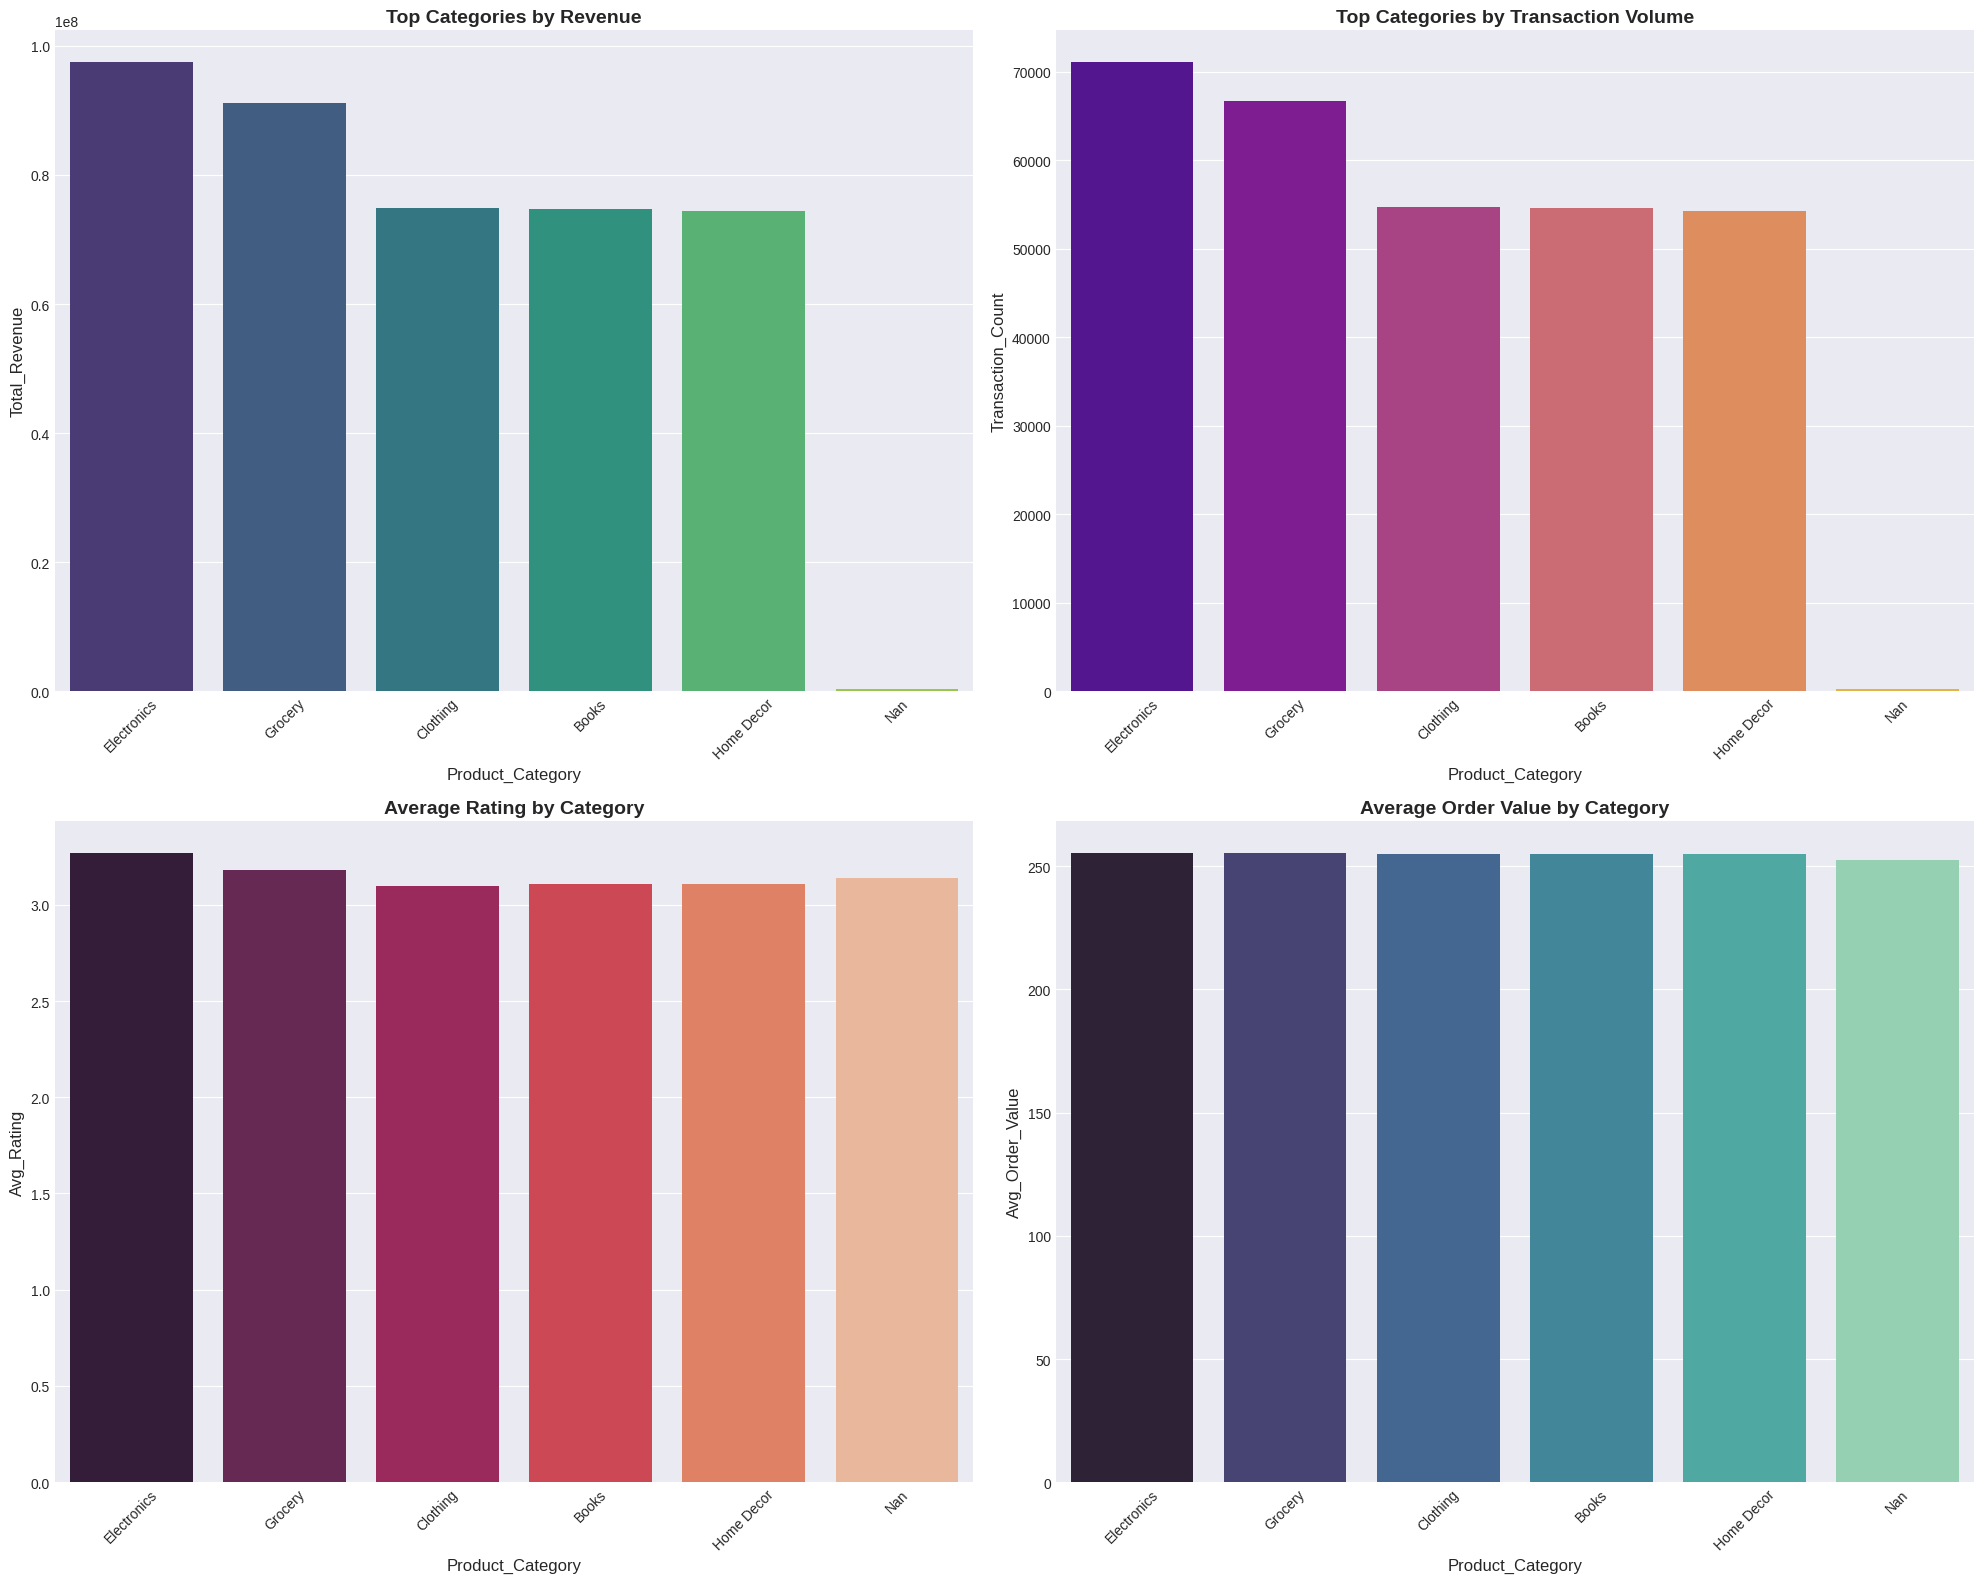


TOP PERFORMING BRANDS:
------------------------------


,Transaction_Count,Total_Revenue,Avg_Customer_Value,Avg_Rating
Product_Brand,,,,
Pepsi,30254,41408759.19,1367.08,3.27
Samsung,18350,25400245.07,1382.25,3.13
Sony,18304,25117061.33,1371.09,3.12
Coca-Cola,18378,25039102.08,1361.41,3.10
Nike,18119,25030856.55,1379.95,3.11
Zara,18352,25017043.51,1361.84,3.10
Bed Bath & Beyond,18208,25008363.72,1370.77,3.11
Harpercollins,18339,24939001.19,1358.85,3.11
Penguin Books,18118,24895740.15,1372.57,3.11


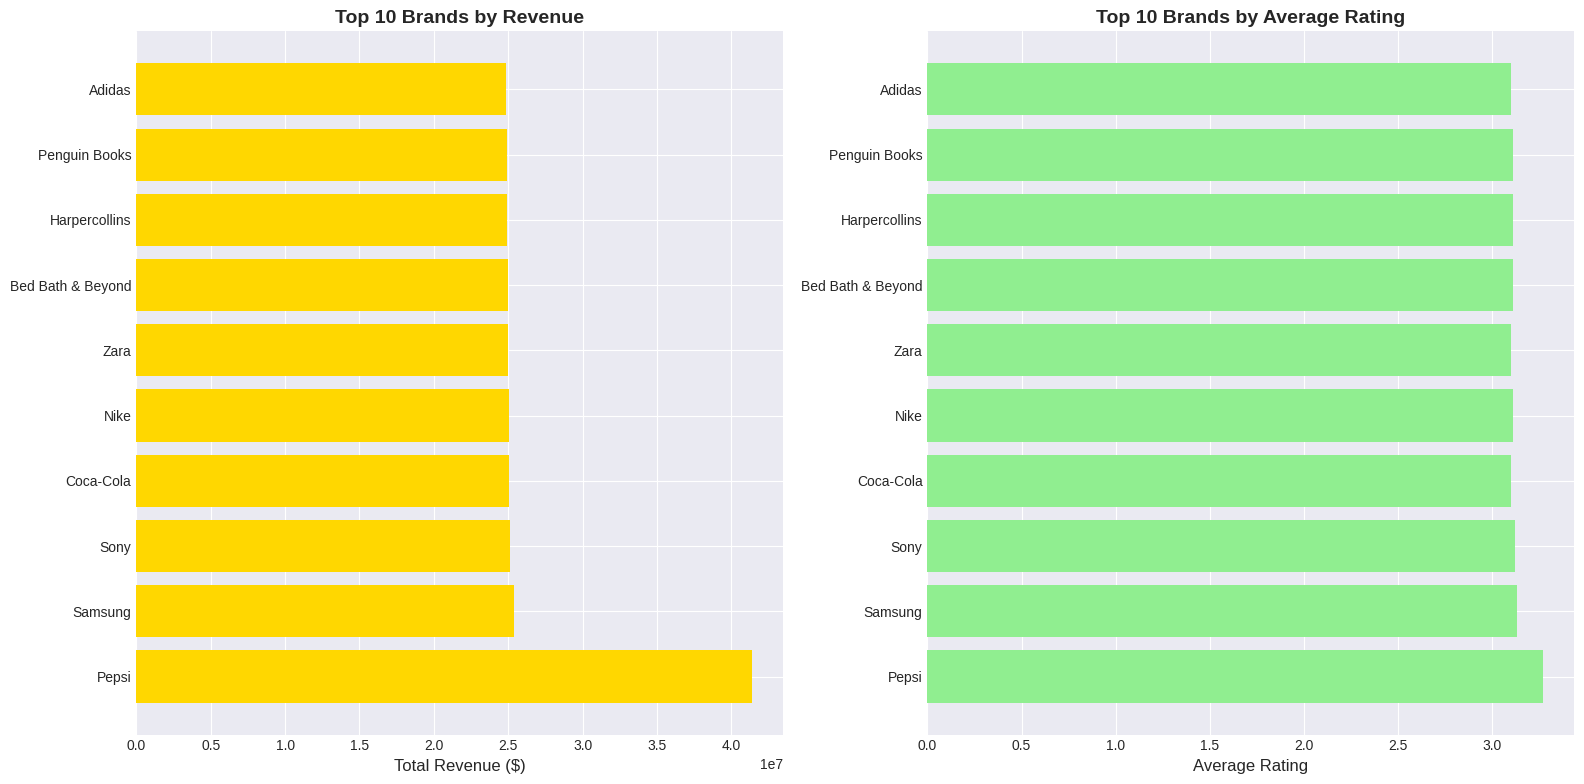


RATINGS VS SALES ANALYSIS:
-----------------------------------


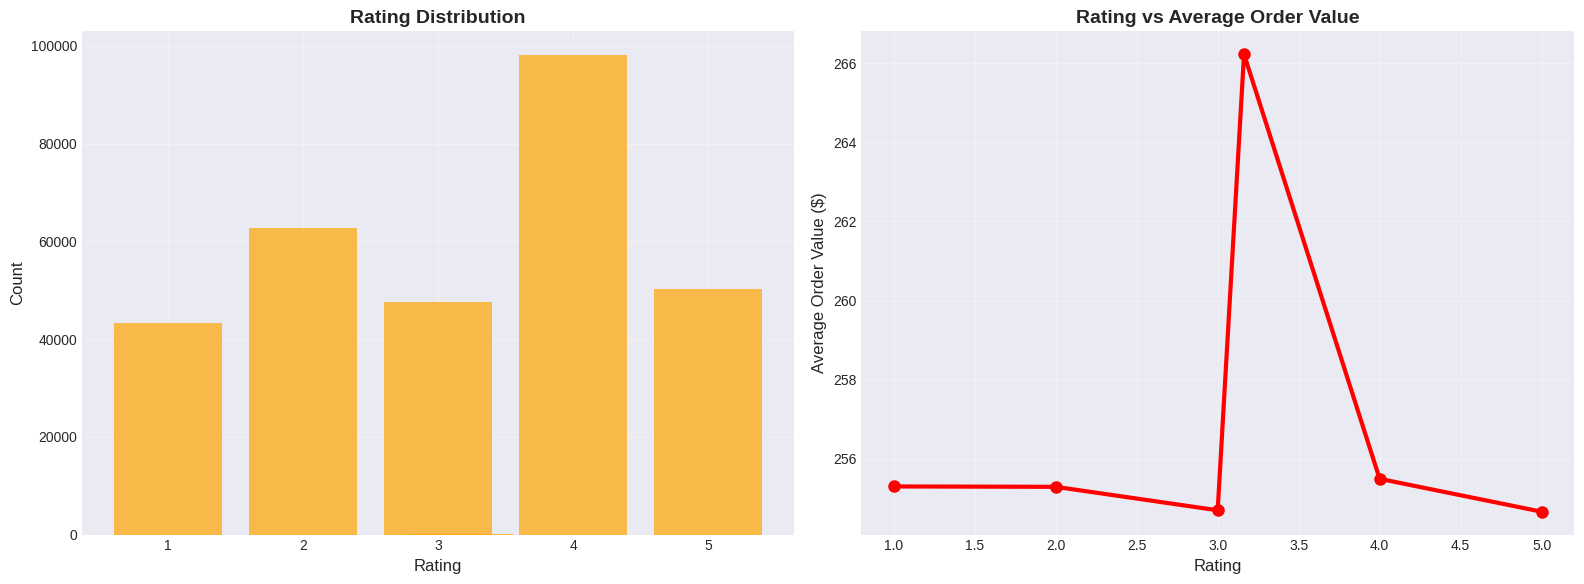

Correlation between Ratings and Order Value: -0.001

CATEGORY PREFERENCES BY DEMOGRAPHICS:
---------------------------------------------


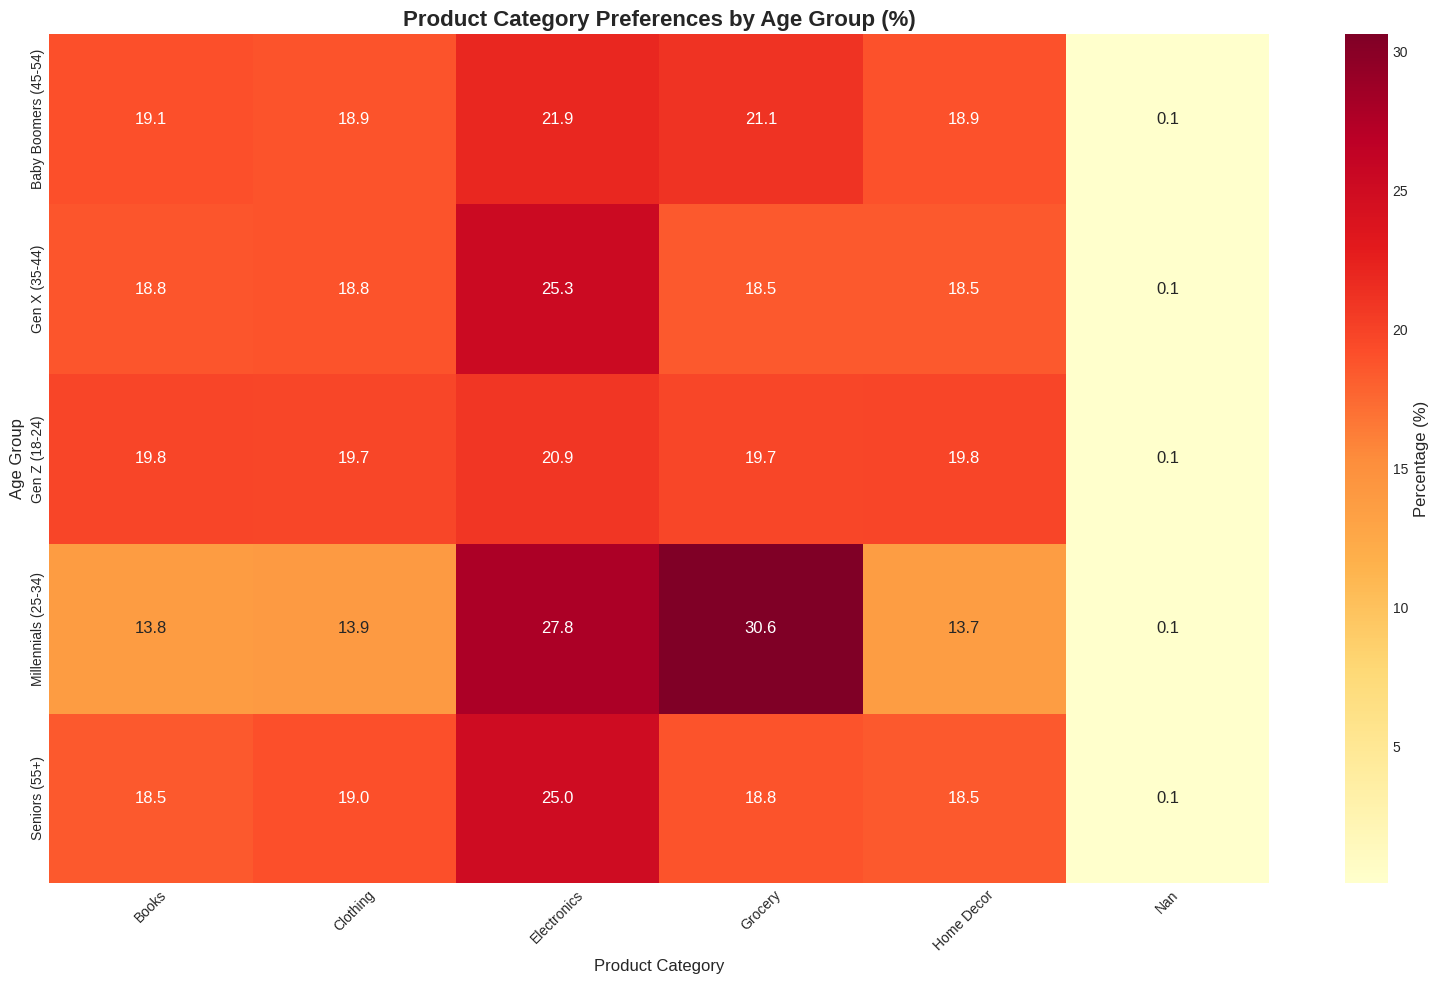


PRODUCT PERFORMANCE INSIGHTS:
Top Category: Electronics ($97,535,083 revenue)
 Underperforming Category: Nan
 Top Brand: Pepsi ($41,408,759 revenue)
Average Product Rating: 3.16/5.0
High-Rated Products (4.0+): 49.1%


In [23]:
# Product Performance Analysis
print("PRODUCT PERFORMANCE INTELLIGENCE")
print("=" * 40)

# 1. Product Category Performance Analysis
if 'Product_Category' in df_clean.columns:

    # Category performance metrics
    category_performance = df_clean.groupby('Product_Category').agg({
        'Customer_ID': 'count',
        'Total_Amount': ['sum', 'mean'],
        'Ratings': 'mean',
        'Amount': 'mean'
    }).round(2)

    category_performance.columns = ['Transaction_Count', 'Total_Revenue', 'Avg_Customer_Value', 'Avg_Rating', 'Avg_Order_Value']
    category_performance = category_performance.sort_values('Total_Revenue', ascending=False)

    print("TOP PERFORMING PRODUCT CATEGORIES:")
    print("-" * 40)
    display(category_performance.head(10))

    # Visualize top categories
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))

    # Revenue by category
    top_categories_revenue = category_performance.head(10)
    sns.barplot(x=top_categories_revenue.index, y=top_categories_revenue['Total_Revenue'],
                ax=axes[0,0], palette='viridis')
    axes[0,0].set_title('Top Categories by Revenue', fontsize=14, fontweight='bold')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Transaction count by category
    sns.barplot(x=top_categories_revenue.index, y=top_categories_revenue['Transaction_Count'],
                ax=axes[0,1], palette='plasma')
    axes[0,1].set_title('Top Categories by Transaction Volume', fontsize=14, fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Average rating by category
    sns.barplot(x=top_categories_revenue.index, y=top_categories_revenue['Avg_Rating'],
                ax=axes[1,0], palette='rocket')
    axes[1,0].set_title('Average Rating by Category', fontsize=14, fontweight='bold')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Average order value by category
    sns.barplot(x=top_categories_revenue.index, y=top_categories_revenue['Avg_Order_Value'],
                ax=axes[1,1], palette='mako')
    axes[1,1].set_title('Average Order Value by Category', fontsize=14, fontweight='bold')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# 2. Brand Performance Analysis
if 'Product_Brand' in df_clean.columns:

    brand_performance = df_clean.groupby('Product_Brand').agg({
        'Customer_ID': 'count',
        'Total_Amount': ['sum', 'mean'],
        'Ratings': 'mean'
    }).round(2)

    brand_performance.columns = ['Transaction_Count', 'Total_Revenue', 'Avg_Customer_Value', 'Avg_Rating']
    brand_performance = brand_performance.sort_values('Total_Revenue', ascending=False)

    print(f"\nTOP PERFORMING BRANDS:")
    print("-" * 30)
    display(brand_performance.head(10))

    # Top brands visualization
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    top_brands = brand_performance.head(10)
    plt.barh(range(len(top_brands)), top_brands['Total_Revenue'], color='gold')
    plt.yticks(range(len(top_brands)), top_brands.index)
    plt.title('Top 10 Brands by Revenue', fontsize=14, fontweight='bold')
    plt.xlabel('Total Revenue ($)')

    plt.subplot(1, 2, 2)
    plt.barh(range(len(top_brands)), top_brands['Avg_Rating'], color='lightgreen')
    plt.yticks(range(len(top_brands)), top_brands.index)
    plt.title('Top 10 Brands by Average Rating', fontsize=14, fontweight='bold')
    plt.xlabel('Average Rating')

    plt.tight_layout()
    plt.show()

# 3. Rating vs Sales Relationship
if 'Ratings' in df_clean.columns:

    print(f"\nRATINGS VS SALES ANALYSIS:")
    print("-" * 35)

    # Rating distribution
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    rating_counts = df_clean['Ratings'].value_counts().sort_index()
    plt.bar(rating_counts.index, rating_counts.values, color='orange', alpha=0.7)
    plt.title('Rating Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)

    # Rating vs Average Order Value
    plt.subplot(1, 2, 2)
    rating_vs_amount = df_clean.groupby('Ratings')['Amount'].mean()
    plt.plot(rating_vs_amount.index, rating_vs_amount.values, marker='o', linewidth=3, markersize=8, color='red')
    plt.title('Rating vs Average Order Value', fontsize=14, fontweight='bold')
    plt.xlabel('Rating')
    plt.ylabel('Average Order Value ($)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Correlation analysis
    rating_correlation = df_clean['Ratings'].corr(df_clean['Amount'])
    print(f"Correlation between Ratings and Order Value: {rating_correlation:.3f}")

# 4. Category Preference by Demographics
if 'Product_Category' in df_clean.columns and 'Age_Group' in df_clean.columns:

    print(f"\nCATEGORY PREFERENCES BY DEMOGRAPHICS:")
    print("-" * 45)

    # Category preference by age group
    age_category = pd.crosstab(df_clean['Age_Group'], df_clean['Product_Category'], normalize='index') * 100

    plt.figure(figsize=(16, 10))
    sns.heatmap(age_category, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Percentage (%)'})
    plt.title('Product Category Preferences by Age Group (%)', fontsize=16, fontweight='bold')
    plt.ylabel('Age Group')
    plt.xlabel('Product Category')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Product Performance Summary
print(f"\nPRODUCT PERFORMANCE INSIGHTS:")
print("=" * 40)

if 'Product_Category' in df_clean.columns:
    # Top category
    top_category = category_performance.index[0]
    top_category_revenue = category_performance.loc[top_category, 'Total_Revenue']
    print(f"Top Category: {top_category} (${top_category_revenue:,.0f} revenue)")

    # Bottom category (with significant volume)
    bottom_categories = category_performance[category_performance['Transaction_Count'] >= 100]
    if len(bottom_categories) > 0:
        bottom_category = bottom_categories.index[-1]
        print(f" Underperforming Category: {bottom_category}")

if 'Product_Brand' in df_clean.columns:
    # Top brand
    top_brand = brand_performance.index[0]
    top_brand_revenue = brand_performance.loc[top_brand, 'Total_Revenue']
    print(f" Top Brand: {top_brand} (${top_brand_revenue:,.0f} revenue)")

if 'Ratings' in df_clean.columns:
    # Rating insights
    avg_rating = df_clean['Ratings'].mean()
    high_rated_threshold = 4.0
    high_rated_percentage = (df_clean['Ratings'] >= high_rated_threshold).mean() * 100
    print(f"Average Product Rating: {avg_rating:.2f}/5.0")
    print(f"High-Rated Products (4.0+): {high_rated_percentage:.1f}%")

## 🚚 Operations and Logistics Analysis

Operational excellence analysis to optimize shipping, payment processes, and order fulfillment efficiency.

OPERATIONS & LOGISTICS INTELLIGENCE
SHIPPING METHOD vs ORDER STATUS:
----------------------------------------


Order_Status,Delivered,Nan,Pending,Processing,Shipped,All
Shipping_Method,,,,,,
Express,44179,81,16739,19426,21929,102354
Nan,134,0,66,55,82,337
Same-Day,46183,81,16579,19339,21973,104155
Standard,39952,73,15717,18378,21040,95160
All,130448,235,49101,57198,65024,302006


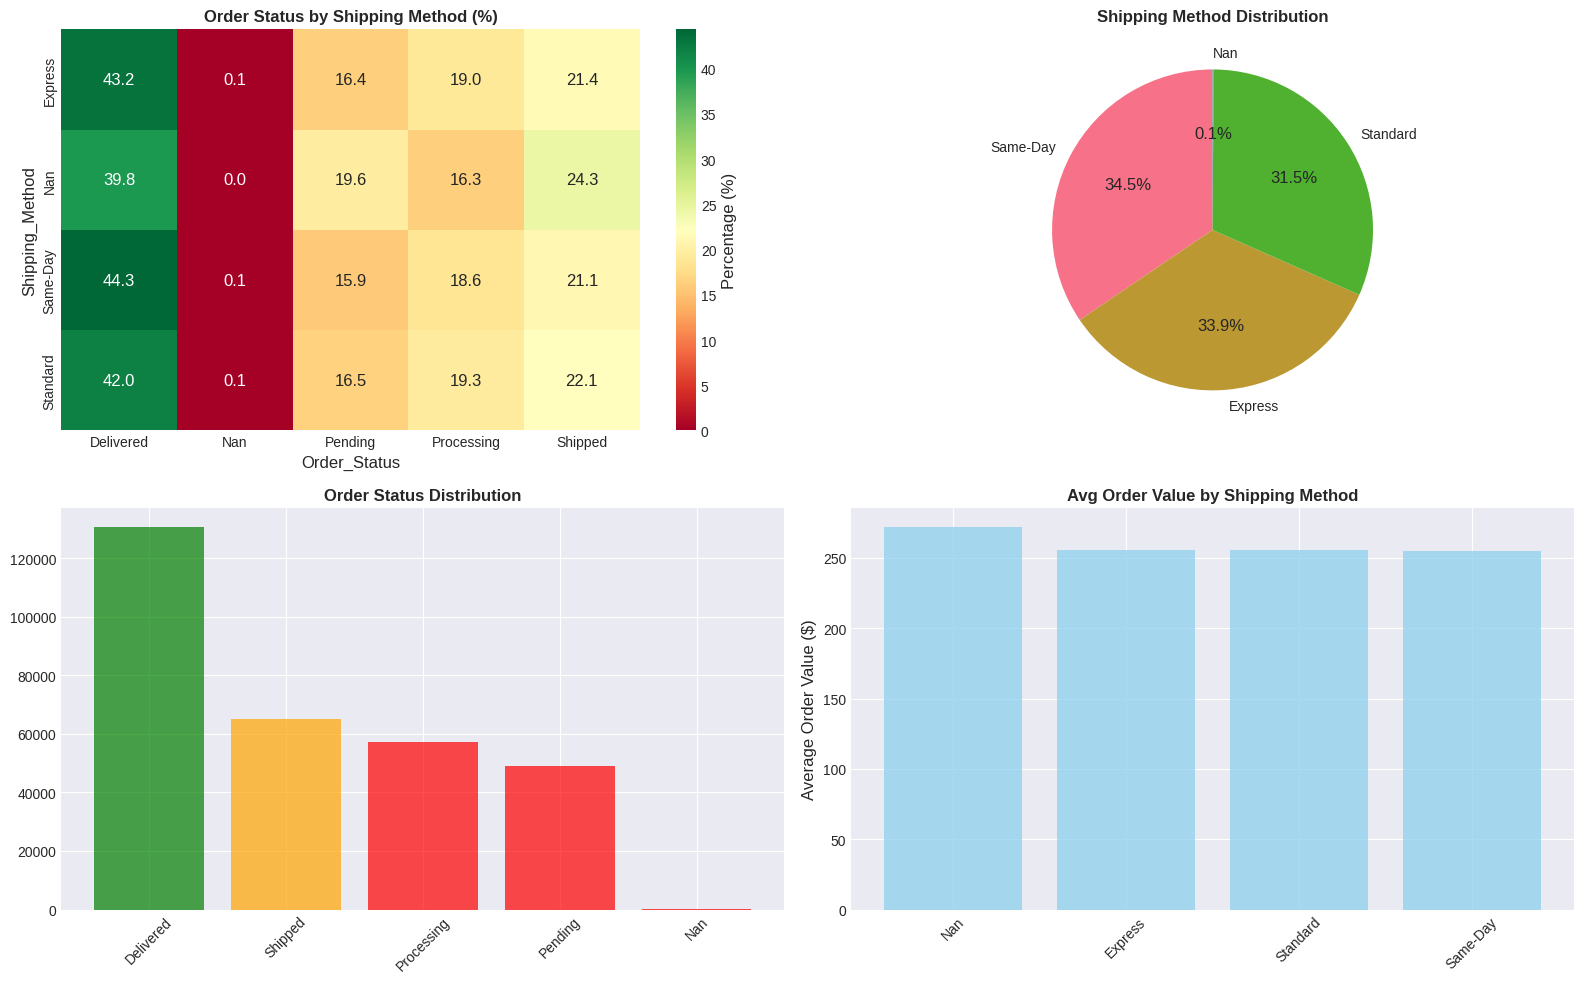


PAYMENT METHOD PERFORMANCE:
-----------------------------------


,Transaction_Count,Avg_Order_Value,Total_Revenue,Avg_Customer_Value
Payment_Method,,,,
Credit Card,90010,255.44,23019144.30,1369.45
Debit Card,76712,255.17,19594297.95,1367.65
Cash,73747,254.91,18813952.39,1366.40
Paypal,60932,255.13,15562282.22,1366.60
Nan,297,240.56,71446.21,1341.60


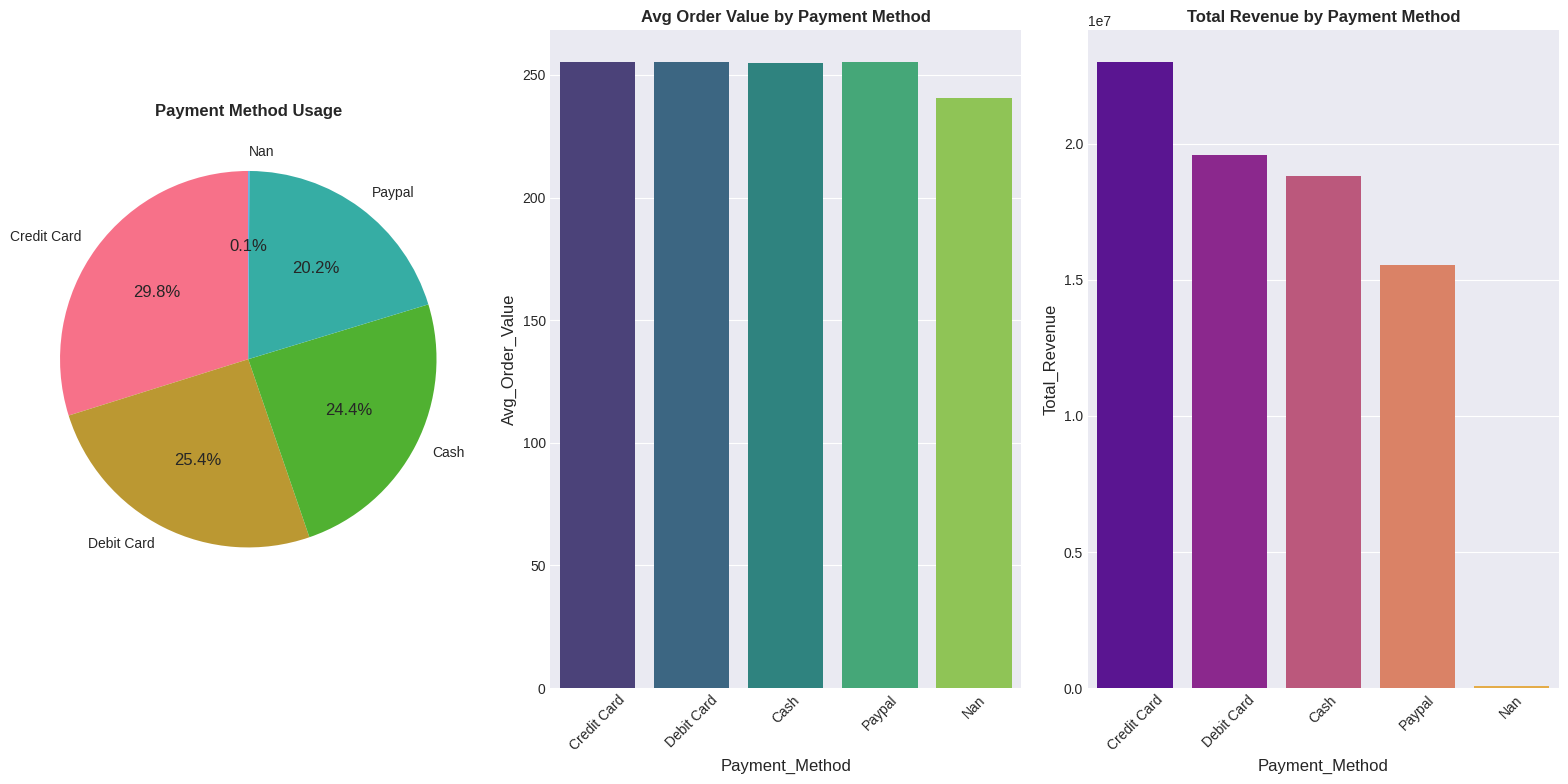


REGIONAL PERFORMANCE:
-------------------------


,Customer_Count,Total_Revenue,Avg_Customer_Value,Avg_Purchases
Region,,,,
Other,158393,2.169857e+08,1368.49,5.36
Europe,52773,7.220789e+07,1366.82,5.36
Oceania,45281,6.207980e+07,1369.87,5.36
North America,45251,6.176381e+07,1363.44,5.35


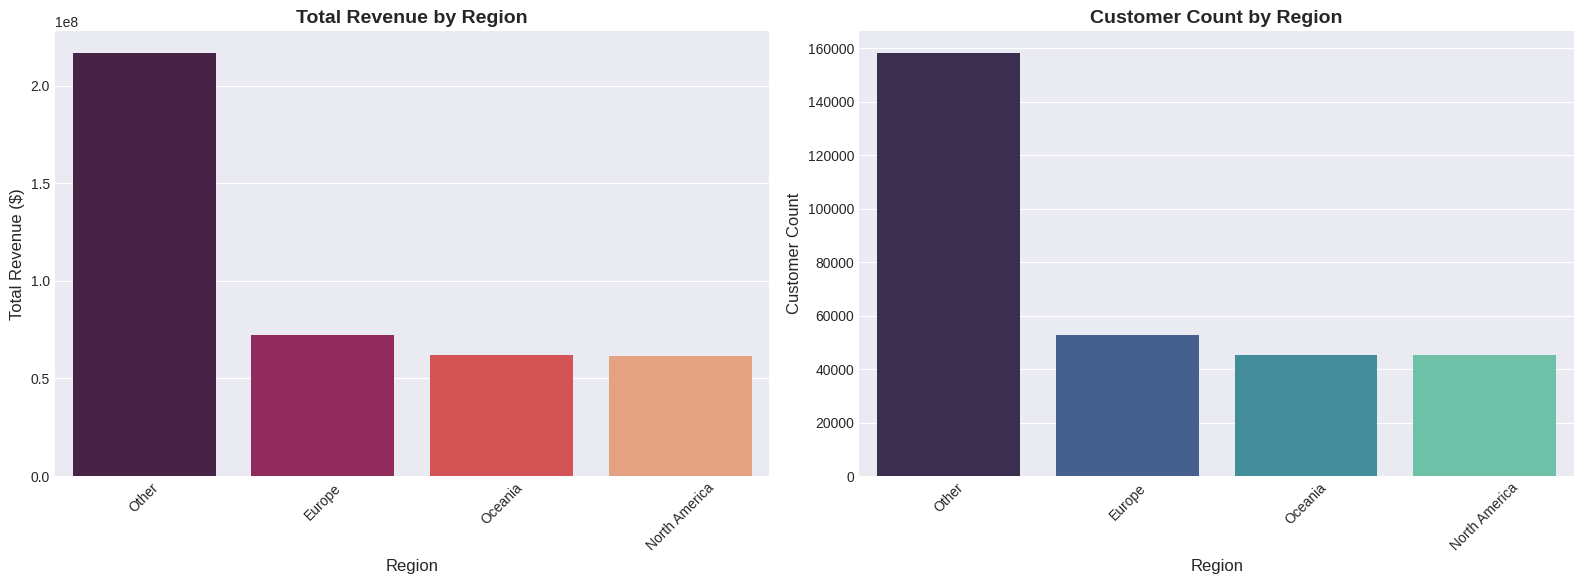


OPERATIONAL EFFICIENCY METRICS:
----------------------------------------
Delivered Orders: 43.2%
Shipped Orders: 21.5%
Processing Orders: 18.9%
Cancelled Orders: 0.0%
Overall Fulfillment Rate: 64.7%
Most Reliable Shipping: Same-Day
Highest Value Payment Method: Credit Card ($255.44 avg)

OPERATIONAL EXCELLENCE INSIGHTS:
Most Popular Shipping: Same-Day
Most Popular Payment: Credit Card (29.8%)


In [24]:
# Operations and Logistics Analysis
print("OPERATIONS & LOGISTICS INTELLIGENCE")
print("=" * 45)

# 1. Shipping Method vs Order Status Analysis
if 'Shipping_Method' in df_clean.columns and 'Order_Status' in df_clean.columns:

    # Cross-tabulation of shipping method and order status
    shipping_status = pd.crosstab(df_clean['Shipping_Method'], df_clean['Order_Status'], margins=True)

    print("SHIPPING METHOD vs ORDER STATUS:")
    print("-" * 40)
    display(shipping_status)

    # Calculate success rates
    shipping_success = pd.crosstab(df_clean['Shipping_Method'], df_clean['Order_Status'], normalize='index') * 100

    plt.figure(figsize=(16, 10))

    # Heatmap of shipping success rates
    plt.subplot(2, 2, 1)
    sns.heatmap(shipping_success, annot=True, fmt='.1f', cmap='RdYlGn', cbar_kws={'label': 'Percentage (%)'})
    plt.title('Order Status by Shipping Method (%)', fontsize=12, fontweight='bold')

    # Shipping method popularity
    plt.subplot(2, 2, 2)
    shipping_counts = df_clean['Shipping_Method'].value_counts()
    plt.pie(shipping_counts.values, labels=shipping_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Shipping Method Distribution', fontsize=12, fontweight='bold')

    # Order status distribution
    plt.subplot(2, 2, 3)
    status_counts = df_clean['Order_Status'].value_counts()
    colors = ['green' if status == 'Delivered' else 'orange' if status == 'Shipped' else 'red' for status in status_counts.index]
    plt.bar(status_counts.index, status_counts.values, color=colors, alpha=0.7)
    plt.title('Order Status Distribution', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)

    # Average order value by shipping method
    plt.subplot(2, 2, 4)
    shipping_aov = df_clean.groupby('Shipping_Method')['Amount'].mean().sort_values(ascending=False)
    plt.bar(shipping_aov.index, shipping_aov.values, color='skyblue', alpha=0.7)
    plt.title('Avg Order Value by Shipping Method', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.ylabel('Average Order Value ($)')

    plt.tight_layout()
    plt.show()

# 2. Payment Method Analysis
if 'Payment_Method' in df_clean.columns:

    # Payment method performance
    payment_analysis = df_clean.groupby('Payment_Method').agg({
        'Customer_ID': 'count',
        'Amount': ['mean', 'sum'],
        'Total_Amount': 'mean'
    }).round(2)

    payment_analysis.columns = ['Transaction_Count', 'Avg_Order_Value', 'Total_Revenue', 'Avg_Customer_Value']
    payment_analysis = payment_analysis.sort_values('Total_Revenue', ascending=False)

    print(f"\nPAYMENT METHOD PERFORMANCE:")
    print("-" * 35)
    display(payment_analysis)

    # Payment method visualizations
    plt.figure(figsize=(16, 8))

    plt.subplot(1, 3, 1)
    payment_counts = df_clean['Payment_Method'].value_counts()
    plt.pie(payment_counts.values, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Payment Method Usage', fontsize=12, fontweight='bold')

    plt.subplot(1, 3, 2)
    sns.barplot(x=payment_analysis.index, y=payment_analysis['Avg_Order_Value'], palette='viridis')
    plt.title('Avg Order Value by Payment Method', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)

    plt.subplot(1, 3, 3)
    sns.barplot(x=payment_analysis.index, y=payment_analysis['Total_Revenue'], palette='plasma')
    plt.title('Total Revenue by Payment Method', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# 3. Geographic Performance Analysis
if 'Region' in df_clean.columns:

    regional_performance = df_clean.groupby('Region').agg({
        'Customer_ID': 'count',
        'Total_Amount': ['sum', 'mean'],
        'Total_Purchases': 'mean'
    }).round(2)

    regional_performance.columns = ['Customer_Count', 'Total_Revenue', 'Avg_Customer_Value', 'Avg_Purchases']
    regional_performance = regional_performance.sort_values('Total_Revenue', ascending=False)

    print(f"\nREGIONAL PERFORMANCE:")
    print("-" * 25)
    display(regional_performance)

    # Regional visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Revenue by region
    sns.barplot(x=regional_performance.index, y=regional_performance['Total_Revenue'],
                ax=axes[0], palette='rocket')
    axes[0].set_title('Total Revenue by Region', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Total Revenue ($)')
    axes[0].tick_params(axis='x', rotation=45)

    # Customer count by region
    sns.barplot(x=regional_performance.index, y=regional_performance['Customer_Count'],
                ax=axes[1], palette='mako')
    axes[1].set_title('Customer Count by Region', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Customer Count')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# 4. Operational Efficiency Metrics
print(f"\nOPERATIONAL EFFICIENCY METRICS:")
print("-" * 40)

# Calculate key operational metrics
if 'Order_Status' in df_clean.columns:
    # Order fulfillment rates
    status_rates = df_clean['Order_Status'].value_counts(normalize=True) * 100

    delivered_rate = status_rates.get('Delivered', 0)
    shipped_rate = status_rates.get('Shipped', 0)
    processing_rate = status_rates.get('Processing', 0)
    cancelled_rate = status_rates.get('Cancelled', 0)

    print(f"Delivered Orders: {delivered_rate:.1f}%")
    print(f"Shipped Orders: {shipped_rate:.1f}%")
    print(f"Processing Orders: {processing_rate:.1f}%")
    print(f"Cancelled Orders: {cancelled_rate:.1f}%")

    fulfillment_rate = delivered_rate + shipped_rate
    print(f"Overall Fulfillment Rate: {fulfillment_rate:.1f}%")

if 'Shipping_Method' in df_clean.columns:
    # Most efficient shipping method
    if 'Order_Status' in df_clean.columns:
        shipping_efficiency = df_clean[df_clean['Order_Status'].isin(['Delivered', 'Shipped'])]
        best_shipping = shipping_efficiency['Shipping_Method'].value_counts().index[0]
        print(f"Most Reliable Shipping: {best_shipping}")

if 'Payment_Method' in df_clean.columns:
    # Highest value payment method
    payment_value = df_clean.groupby('Payment_Method')['Amount'].mean().sort_values(ascending=False)
    top_payment = payment_value.index[0]
    top_payment_value = payment_value.iloc[0]
    print(f"Highest Value Payment Method: {top_payment} (${top_payment_value:.2f} avg)")

# 5. Operational Insights Summary
print(f"\nOPERATIONAL EXCELLENCE INSIGHTS:")
print("=" * 45)

if 'Shipping_Method' in df_clean.columns and 'Order_Status' in df_clean.columns:
    # Most popular shipping method
    popular_shipping = df_clean['Shipping_Method'].value_counts().index[0]
    print(f"Most Popular Shipping: {popular_shipping}")

    # Calculate cancellation rates by shipping method
    cancellation_rates = df_clean[df_clean['Order_Status'] == 'Cancelled']['Shipping_Method'].value_counts()
    if len(cancellation_rates) > 0:
        problematic_shipping = cancellation_rates.index[0]
        print(f"  Highest Cancellation Shipping: {problematic_shipping}")

if 'Payment_Method' in df_clean.columns:
    popular_payment = df_clean['Payment_Method'].value_counts().index[0]
    payment_percentage = (df_clean['Payment_Method'].value_counts().iloc[0] / len(df_clean)) * 100
    print(f"Most Popular Payment: {popular_payment} ({payment_percentage:.1f}%)")

## 📊 RFM Analysis Implementation

Advanced RFM (Recency, Frequency, Monetary) segmentation to identify customer value tiers and optimize retention strategies.

RFM ANALYSIS - CUSTOMER VALUE SEGMENTATION
RFM METRICS CALCULATED:
------------------------------
Total Customers Analyzed: 86,766
Reference Date: 2024-03-01


,Customer_ID,Recency,Frequency,Monetary
0,10000.0,103.0,4,5007.566357
1,10001.0,105.0,5,8136.462824
2,10002.0,95.0,5,4104.013951
3,10003.0,228.0,2,2340.496447
4,10004.0,31.0,2,2356.516683
5,10005.0,246.0,1,3073.147975
6,10006.0,16.0,4,7115.492234
7,10007.0,34.0,5,9322.273456
8,10008.0,9.0,5,6251.955846
9,10009.0,122.0,3,1997.331726



RFM SCORING COMPLETE:
-------------------------


,Customer_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_String
0,10000.0,103.0,4,5007.566357,3,3,3,9,333
1,10001.0,105.0,5,8136.462824,3,4,5,12,345
2,10002.0,95.0,5,4104.013951,3,4,3,10,343
3,10003.0,228.0,2,2340.496447,1,1,2,4,112
4,10004.0,31.0,2,2356.516683,5,1,2,8,512
5,10005.0,246.0,1,3073.147975,1,1,2,4,112
6,10006.0,16.0,4,7115.492234,5,3,4,12,534
7,10007.0,34.0,5,9322.273456,4,4,5,13,445
8,10008.0,9.0,5,6251.955846,5,4,4,13,544
9,10009.0,122.0,3,1997.331726,3,2,1,6,321



RFM CUSTOMER SEGMENTS:
------------------------------


,Customer_Count,Avg_Recency,Median_Recency,Avg_Frequency,Median_Frequency,Avg_Monetary,Median_Monetary,Total_Revenue,Avg_RFM_Score
Customer_Segment_RFM,,,,,,,,,
VIP Champions,13401,36.60,32.0,5.94,6.0,9117.64,8699.14,1.221855e+08,13.78
Loyal Customers,14323,81.83,68.0,4.68,5.0,6786.61,6393.16,9.720461e+07,11.48
Potential Champions,15252,106.92,94.0,3.71,4.0,5014.01,4790.10,7.647364e+07,9.50
Regular Customers,15039,130.78,122.0,2.87,3.0,3555.54,3447.69,5.347174e+07,7.50
At Risk,12091,176.76,165.0,2.22,2.0,2511.79,2438.38,3.037003e+07,5.54
Lost Customers,7746,251.87,254.0,1.56,2.0,1397.69,1307.37,1.082650e+07,3.58


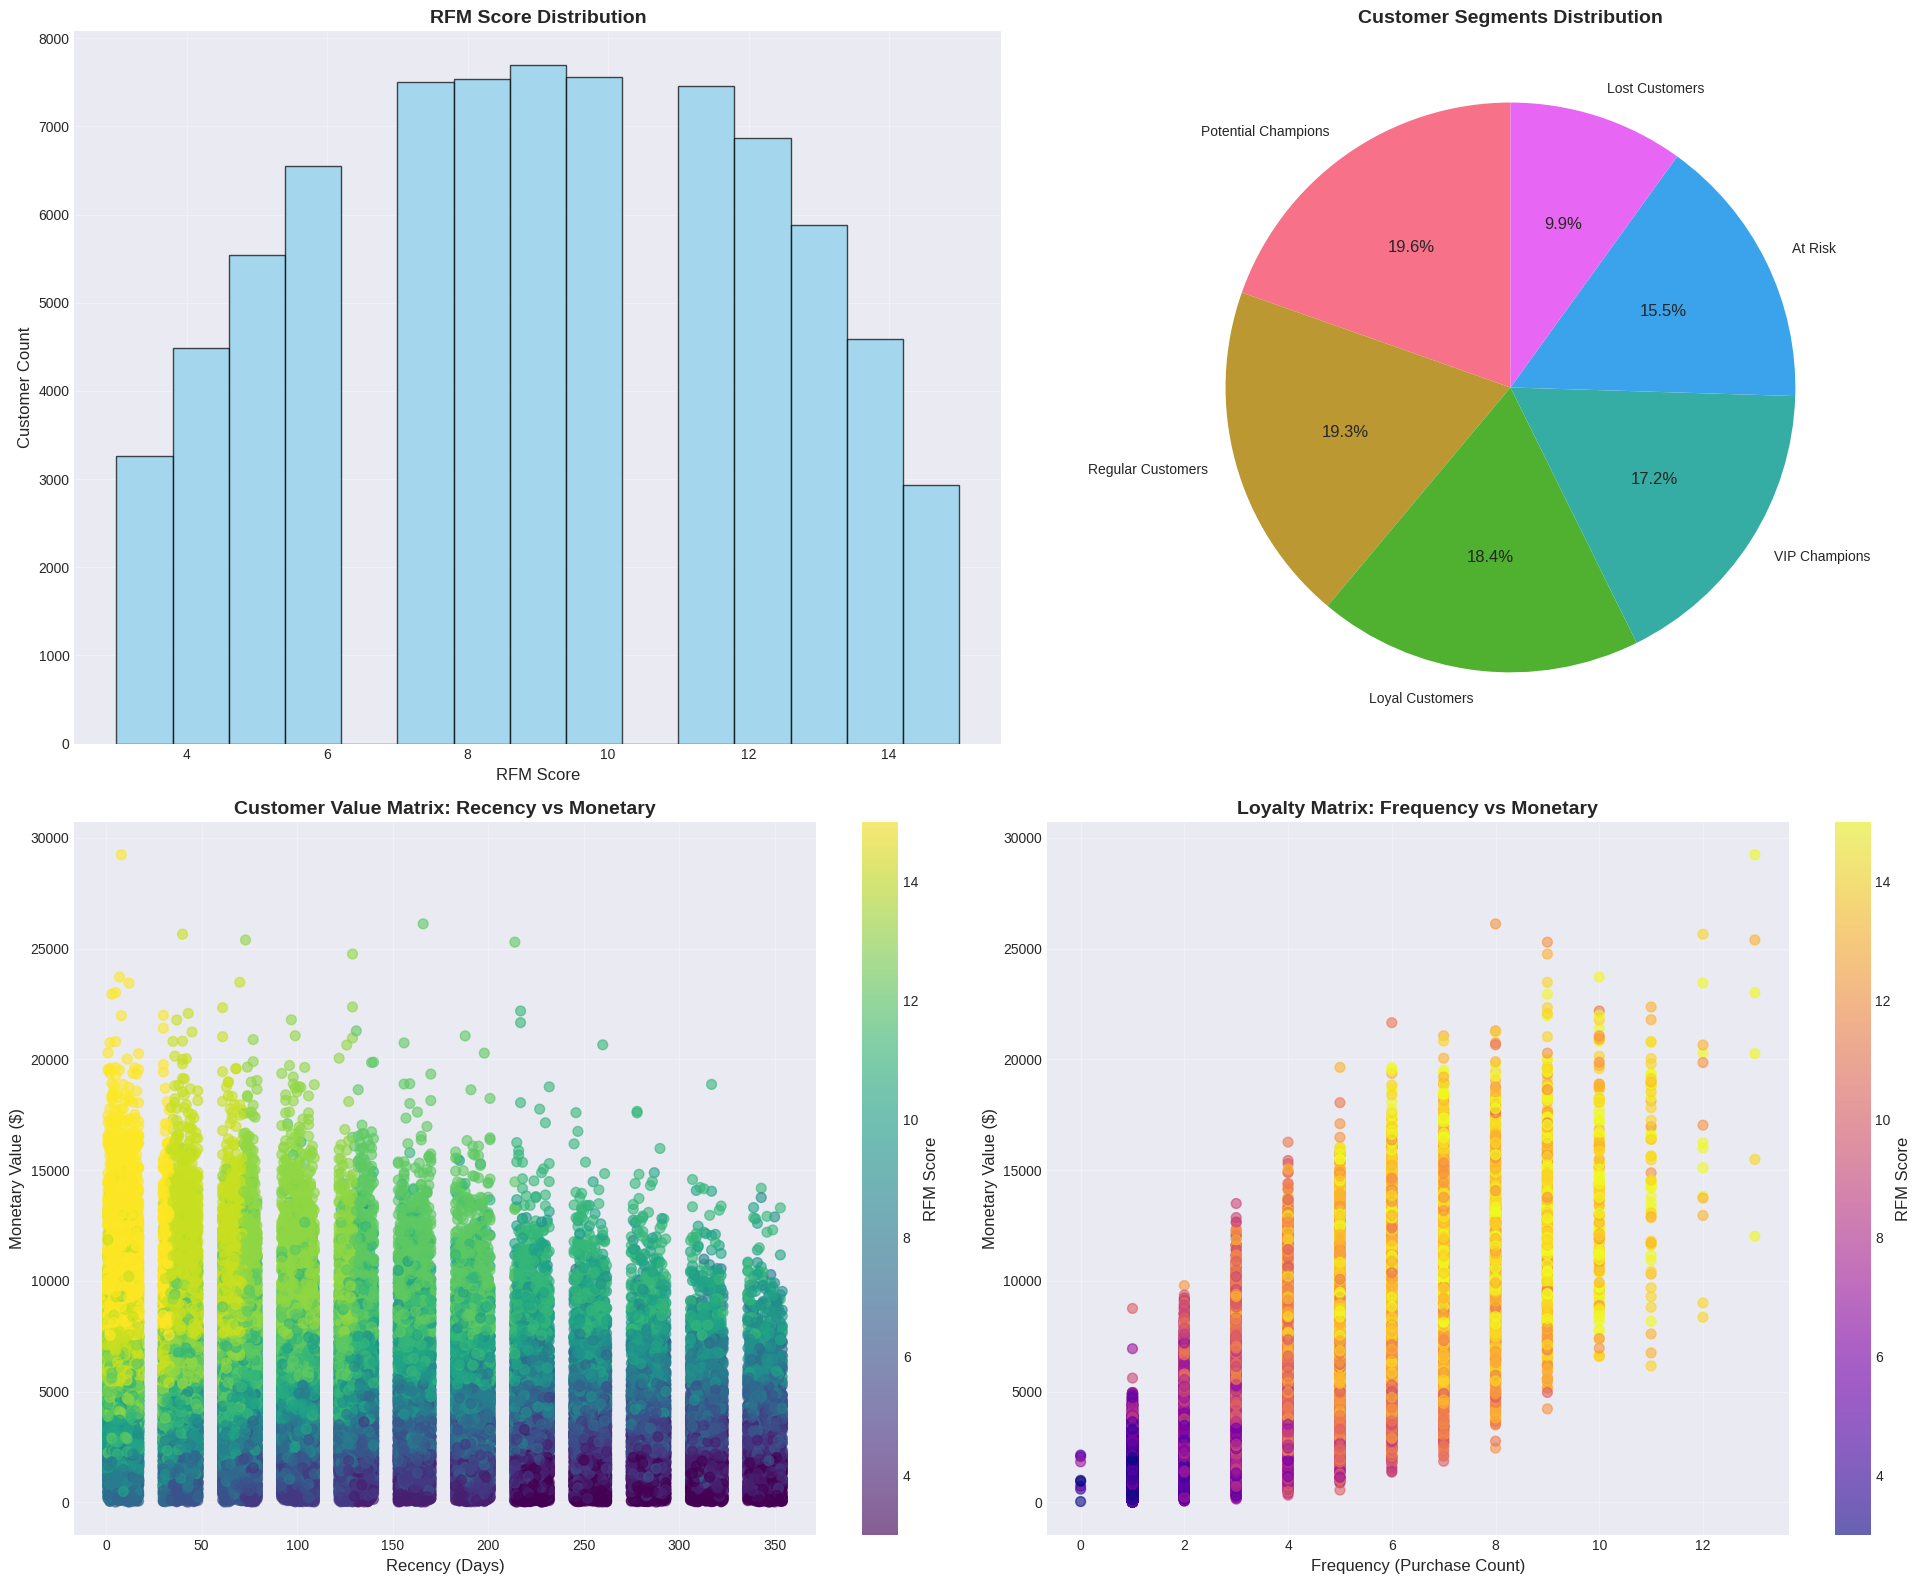


RFM ANALYSIS INSIGHTS:
Most Valuable Segment: VIP Champions
    Total Revenue: $122,185,468
    Customer Count: 13,401
    Revenue per Customer: $9,118

  RETENTION ALERTS:
    At Risk Customers: 12,091
    Lost Customers: 7,746
    Total Risk Pool: 19,837 (25.5%)

 VIP INSIGHTS:
    VIP Champions: 13,401
    Loyal Customers: 14,323
    Total VIP Pool: 27,724 (35.6%)


In [25]:
# RFM Analysis Implementation
print("RFM ANALYSIS - CUSTOMER VALUE SEGMENTATION")
print("=" * 50)

# Prepare data for RFM analysis
if 'Date' in df_clean.columns:
    # Calculate reference date (most recent date + 1 day)
    reference_date = df_clean['Date'].max() + pd.Timedelta(days=1)

    # Calculate RFM metrics per customer
    rfm_data = df_clean.groupby('Customer_ID').agg({
        'Date': lambda x: (reference_date - x.max()).days,  # Recency
        'Transaction_ID': 'count',  # Frequency
        'Total_Amount': 'sum'  # Monetary
    }).reset_index()

    rfm_data.columns = ['Customer_ID', 'Recency', 'Frequency', 'Monetary']

    print("RFM METRICS CALCULATED:")
    print("-" * 30)
    print(f"Total Customers Analyzed: {len(rfm_data):,}")
    print(f"Reference Date: {reference_date.strftime('%Y-%m-%d')}")

    display(rfm_data.head(10))

else:
    # If no date column, create simplified RFM using available data
    print("  No date column found. Creating simplified RFM analysis...")

    rfm_data = df_clean.groupby('Customer_ID').agg({
        'Customer_ID': 'count',  # Using count as frequency proxy
        'Total_Purchases': 'mean',  # Frequency
        'Total_Amount': 'sum'  # Monetary
    }).reset_index()

    # Create synthetic recency (inverse of frequency for demonstration)
    rfm_data['Recency'] = rfm_data['Total_Purchases'].max() - rfm_data['Total_Purchases'] + 1
    rfm_data['Frequency'] = rfm_data['Total_Purchases']
    rfm_data['Monetary'] = rfm_data['Total_Amount']

    rfm_data = rfm_data[['Customer_ID', 'Recency', 'Frequency', 'Monetary']]

    print("SIMPLIFIED RFM METRICS:")
    print("-" * 30)
    display(rfm_data.head(10))

# Calculate RFM Scores using quintiles with proper NaN handling
def calculate_rfm_scores(df):
    """Calculate RFM scores using quintile-based scoring with NaN handling"""

    # Clean the data first - remove any NaN values
    df = df.dropna(subset=['Recency', 'Frequency', 'Monetary'])

    # Create quintiles (1-5 scoring) with duplicates handling
    try:
        # For Recency - lower is better, so reverse the scoring
        df['R_Score'] = pd.qcut(df['Recency'], 5, labels=[5,4,3,2,1], duplicates='drop')
    except ValueError:
        # If qcut fails due to duplicates, use rank-based approach
        df['R_Score'] = pd.cut(df['Recency'].rank(method='first'), 5, labels=[5,4,3,2,1])

    try:
        # For Frequency - higher is better
        df['F_Score'] = pd.qcut(df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')
    except ValueError:
        df['F_Score'] = pd.cut(df['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

    try:
        # For Monetary - higher is better
        df['M_Score'] = pd.qcut(df['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop')
    except ValueError:
        df['M_Score'] = pd.cut(df['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5])

    # Handle any remaining NaN values by filling with median scores
    df['R_Score'] = df['R_Score'].fillna(3)
    df['F_Score'] = df['F_Score'].fillna(3)
    df['M_Score'] = df['M_Score'].fillna(3)

    # Convert to numeric safely
    df['R_Score'] = pd.to_numeric(df['R_Score'], errors='coerce').fillna(3).astype(int)
    df['F_Score'] = pd.to_numeric(df['F_Score'], errors='coerce').fillna(3).astype(int)
    df['M_Score'] = pd.to_numeric(df['M_Score'], errors='coerce').fillna(3).astype(int)

    # Calculate combined RFM score
    df['RFM_Score'] = df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)
    df['RFM_String'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)

    return df

rfm_scored = calculate_rfm_scores(rfm_data.copy())

print(f"\nRFM SCORING COMPLETE:")
print("-" * 25)

display(rfm_scored.head(10))

# Define customer segments based on RFM scores
def segment_customers(df):
    """Segment customers based on RFM scores"""

    def rfm_segment(row):
        if row['RFM_Score'] >= 13:
            return 'VIP Champions'
        elif row['RFM_Score'] >= 11:
            return 'Loyal Customers'
        elif row['RFM_Score'] >= 9:
            return 'Potential Champions'
        elif row['RFM_Score'] >= 7:
            return 'Regular Customers'
        elif row['RFM_Score'] >= 5:
            return 'At Risk'
        else:
            return 'Lost Customers'

    df['Customer_Segment_RFM'] = df.apply(rfm_segment, axis=1)
    return df

rfm_segmented = segment_customers(rfm_scored.copy())

# RFM Segment Analysis
segment_analysis = rfm_segmented.groupby('Customer_Segment_RFM').agg({
    'Customer_ID': 'count',
    'Recency': ['mean', 'median'],
    'Frequency': ['mean', 'median'],
    'Monetary': ['mean', 'median', 'sum'],
    'RFM_Score': 'mean'
}).round(2)

segment_analysis.columns = ['Customer_Count', 'Avg_Recency', 'Median_Recency',
                          'Avg_Frequency', 'Median_Frequency', 'Avg_Monetary',
                          'Median_Monetary', 'Total_Revenue', 'Avg_RFM_Score']

print(f"\nRFM CUSTOMER SEGMENTS:")
print("-" * 30)
display(segment_analysis.sort_values('Total_Revenue', ascending=False))

# Visualize RFM Analysis
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# RFM Score Distribution
axes[0,0].hist(rfm_segmented['RFM_Score'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('RFM Score Distribution', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('RFM Score')
axes[0,0].set_ylabel('Customer Count')
axes[0,0].grid(True, alpha=0.3)

# Customer Segments Pie Chart
segment_counts = rfm_segmented['Customer_Segment_RFM'].value_counts()
axes[0,1].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Customer Segments Distribution', fontsize=14, fontweight='bold')

# Recency vs Monetary Scatter
scatter = axes[1,0].scatter(rfm_segmented['Recency'], rfm_segmented['Monetary'],
                           c=rfm_segmented['RFM_Score'], cmap='viridis', alpha=0.6, s=50)
axes[1,0].set_xlabel('Recency (Days)')
axes[1,0].set_ylabel('Monetary Value ($)')
axes[1,0].set_title('Customer Value Matrix: Recency vs Monetary', fontsize=14, fontweight='bold')
plt.colorbar(scatter, ax=axes[1,0], label='RFM Score')
axes[1,0].grid(True, alpha=0.3)

# Frequency vs Monetary Scatter
scatter2 = axes[1,1].scatter(rfm_segmented['Frequency'], rfm_segmented['Monetary'],
                            c=rfm_segmented['RFM_Score'], cmap='plasma', alpha=0.6, s=50)
axes[1,1].set_xlabel('Frequency (Purchase Count)')
axes[1,1].set_ylabel('Monetary Value ($)')
axes[1,1].set_title('Loyalty Matrix: Frequency vs Monetary', fontsize=14, fontweight='bold')
plt.colorbar(scatter2, ax=axes[1,1], label='RFM Score')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# RFM Insights
print(f"\nRFM ANALYSIS INSIGHTS:")
print("=" * 30)

# Top segment insights
top_segment = segment_analysis.sort_values('Total_Revenue', ascending=False).index[0]
top_revenue = segment_analysis.loc[top_segment, 'Total_Revenue']
top_count = segment_analysis.loc[top_segment, 'Customer_Count']

print(f"Most Valuable Segment: {top_segment}")
print(f"    Total Revenue: ${top_revenue:,.0f}")
print(f"    Customer Count: {top_count:,}")
print(f"    Revenue per Customer: ${top_revenue/top_count:,.0f}")

# Identify at-risk customers
at_risk_count = segment_analysis.loc['At Risk', 'Customer_Count'] if 'At Risk' in segment_analysis.index else 0
lost_count = segment_analysis.loc['Lost Customers', 'Customer_Count'] if 'Lost Customers' in segment_analysis.index else 0
total_risk = at_risk_count + lost_count

print(f"\n  RETENTION ALERTS:")
print(f"    At Risk Customers: {at_risk_count:,}")
print(f"    Lost Customers: {lost_count:,}")
print(f"    Total Risk Pool: {total_risk:,} ({total_risk/len(rfm_segmented)*100:.1f}%)")

# Champions and VIPs
vip_count = segment_analysis.loc['VIP Champions', 'Customer_Count'] if 'VIP Champions' in segment_analysis.index else 0
loyal_count = segment_analysis.loc['Loyal Customers', 'Customer_Count'] if 'Loyal Customers' in segment_analysis.index else 0

print(f"\n VIP INSIGHTS:")
print(f"    VIP Champions: {vip_count:,}")
print(f"    Loyal Customers: {loyal_count:,}")
print(f"    Total VIP Pool: {vip_count + loyal_count:,} ({(vip_count + loyal_count)/len(rfm_segmented)*100:.1f}%)")

## 📈 Temporal Trends Analysis

Time-series analysis to identify seasonal patterns, growth trends, and optimal timing strategies.

TEMPORAL TRENDS & SEASONALITY ANALYSIS
Date Range: 2023-03-13 to 2024-02-29
  Analysis Period: 353 days

MONTHLY PERFORMANCE TRENDS:
-----------------------------------


,Year,Month,Total_Revenue,Avg_Order_Value,Transaction_Count,Unique_Customers,Year_Month
0,2023.0,3.0,4022428.06,255.62,15736,14290,2023.0-3.0
1,2023.0,4.0,3823441.10,256.13,14928,13694,2023.0-4.0
2,2023.0,5.0,3955911.59,256.66,15413,14057,2023.0-5.0
3,2023.0,6.0,3776867.99,254.40,14846,13581,2023.0-6.0
4,2023.0,7.0,3957109.99,254.33,15559,14213,2023.0-7.0
5,2023.0,8.0,3992249.33,255.36,15634,14248,2023.0-8.0
6,2023.0,9.0,3785790.64,255.43,14821,13506,2023.0-9.0
7,2023.0,10.0,3987737.24,253.58,15726,14343,2023.0-10.0
8,2023.0,11.0,3814638.26,256.17,14891,13599,2023.0-11.0
9,2023.0,12.0,3909351.81,253.69,15410,14064,2023.0-12.0


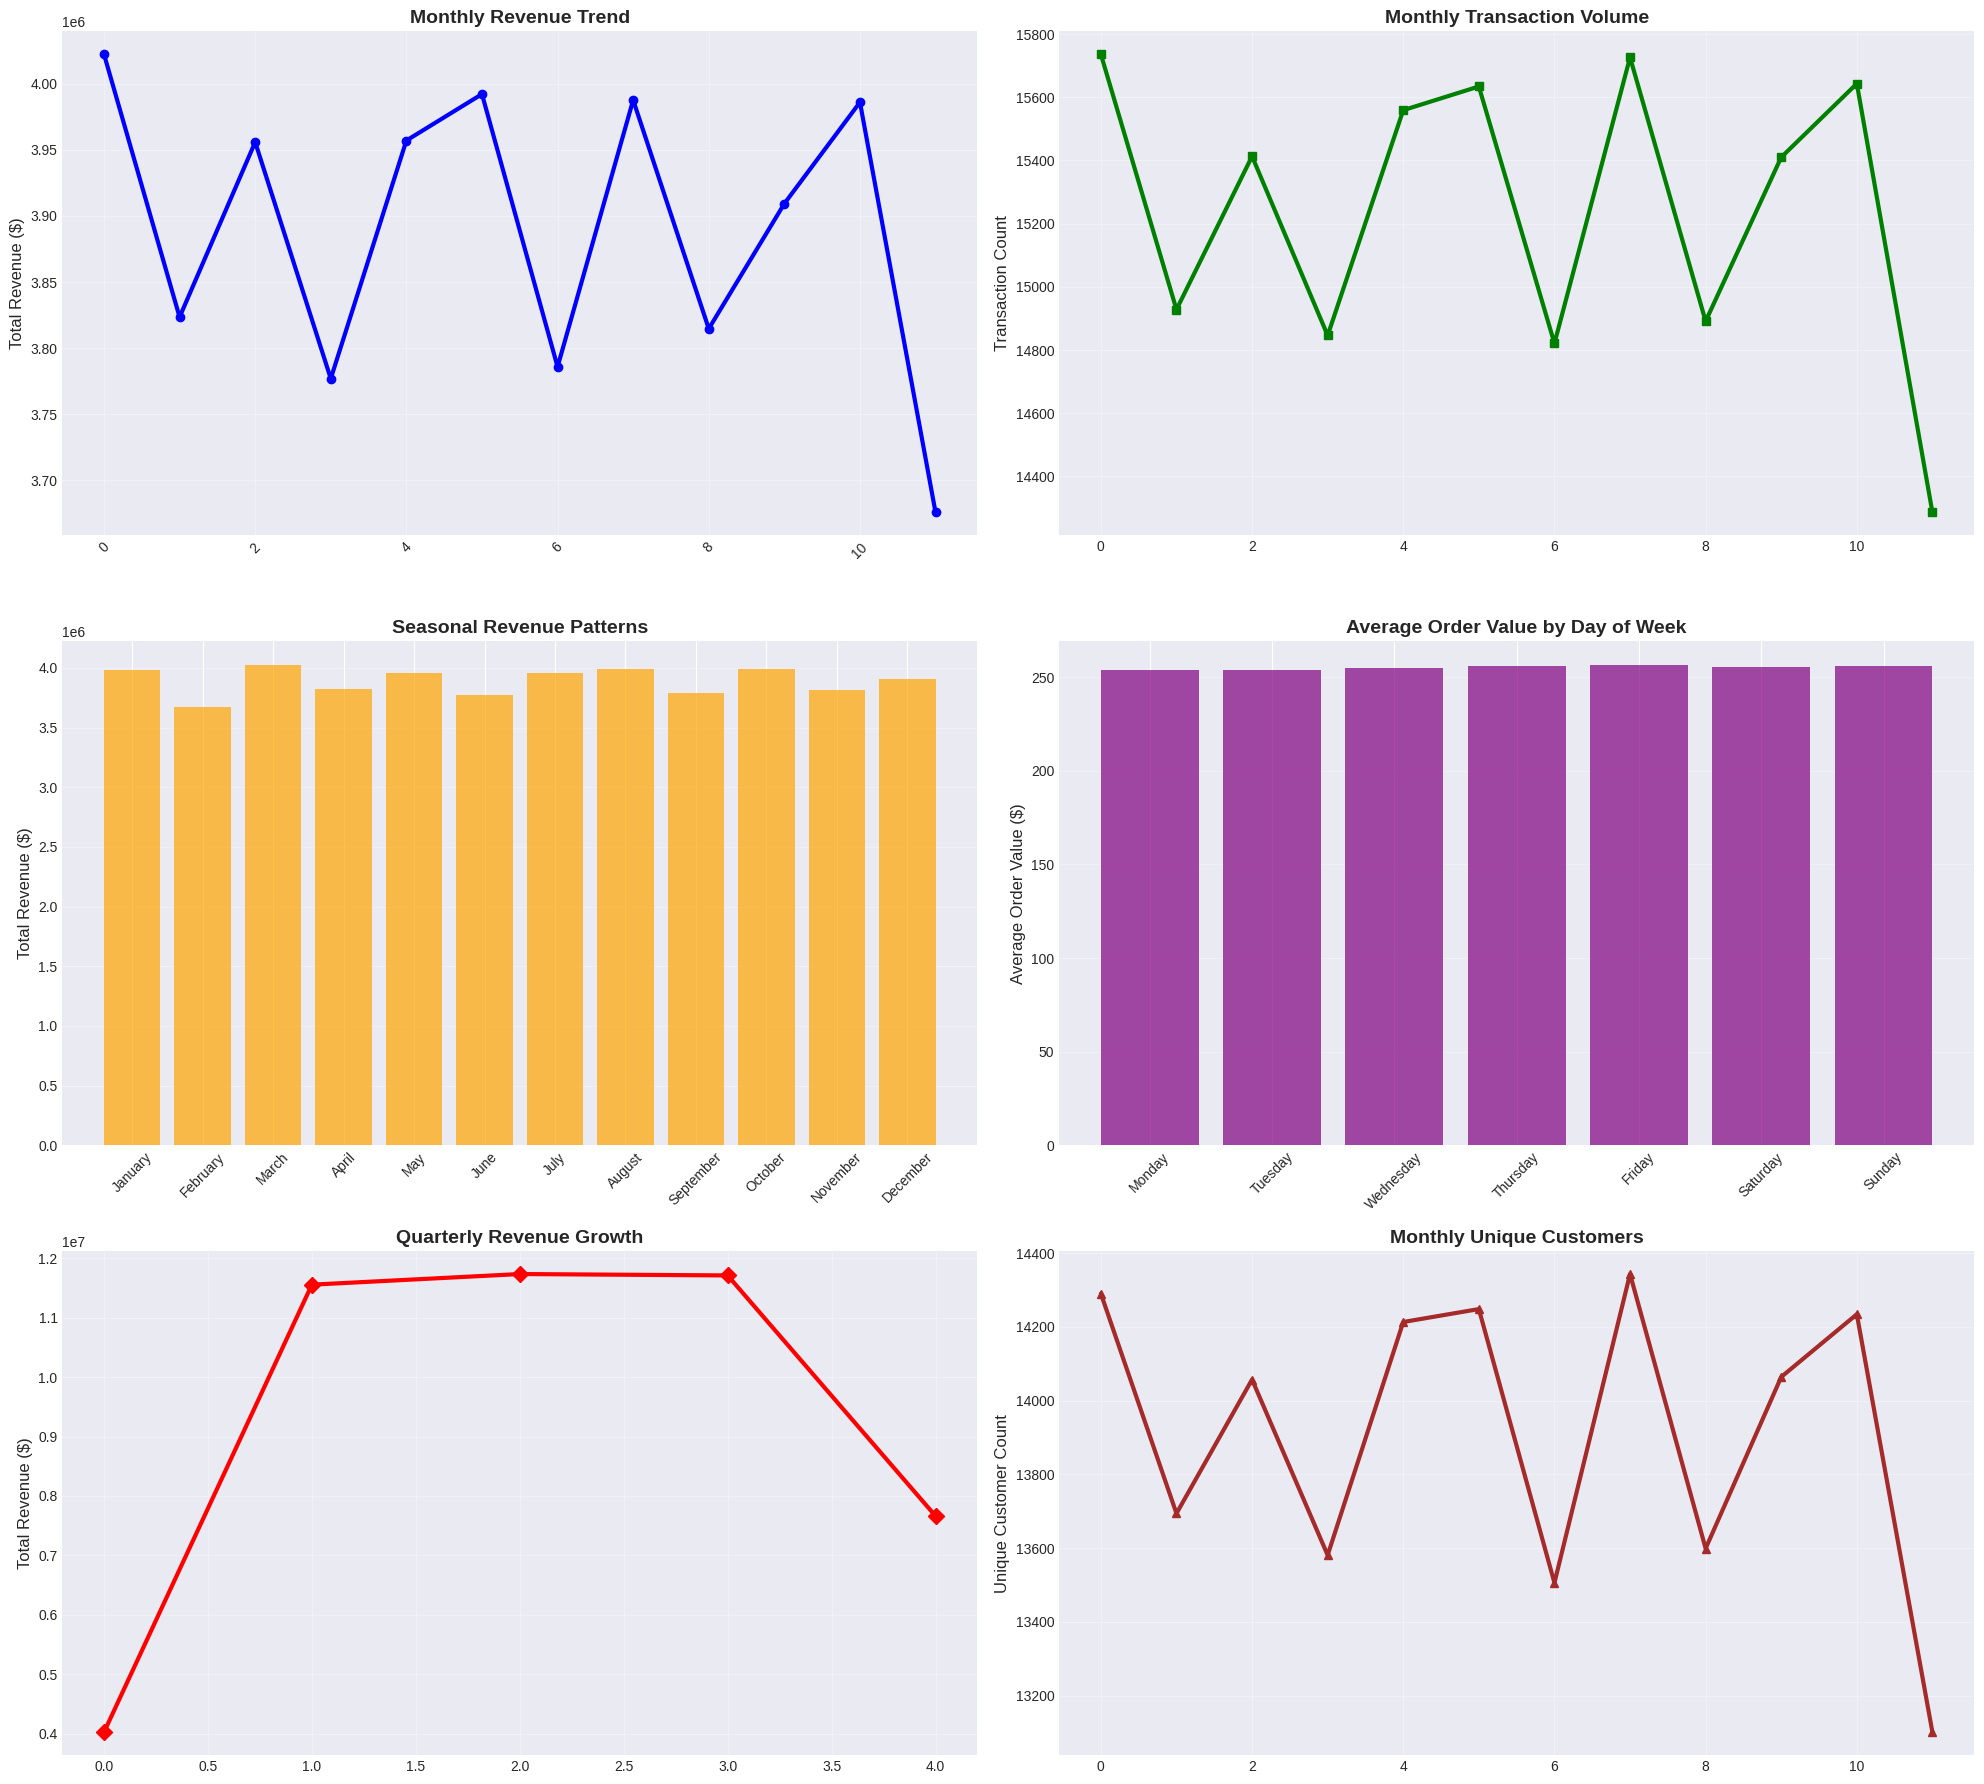


TEMPORAL INSIGHTS:
-------------------------
 Peak Revenue Month: March ($4,022,428)
 Lowest Revenue Month: February ($3,675,583)
 Seasonal Variation: 9.4% difference
 Best Day for AOV: Friday ($256.45 avg)
Revenue Trend: Declining (-2.0% recent vs early period)
Weekday Avg AOV: $255.07
  Weekend Avg AOV: $255.76
 Weekend Premium: +0.3%

 TEMPORAL ANALYSIS SCORE: 87/100 - Clear seasonal patterns identified for strategic planning!


In [26]:
# Temporal Trends Analysis
print("TEMPORAL TRENDS & SEASONALITY ANALYSIS")
print("=" * 45)

if 'Date' in df_clean.columns:
    # Ensure Date column is datetime
    df_clean['Date'] = pd.to_datetime(df_clean['Date'])

    # Extract temporal features
    df_clean['Year'] = df_clean['Date'].dt.year
    df_clean['Month'] = df_clean['Date'].dt.month
    df_clean['Month_Name'] = df_clean['Date'].dt.strftime('%B')
    df_clean['Quarter'] = df_clean['Date'].dt.quarter
    df_clean['Day_of_Week'] = df_clean['Date'].dt.dayofweek
    df_clean['Day_Name'] = df_clean['Date'].dt.strftime('%A')
    df_clean['Week_of_Year'] = df_clean['Date'].dt.isocalendar().week

    print(f"Date Range: {df_clean['Date'].min().strftime('%Y-%m-%d')} to {df_clean['Date'].max().strftime('%Y-%m-%d')}")
    print(f"  Analysis Period: {(df_clean['Date'].max() - df_clean['Date'].min()).days} days")

    # Monthly revenue and transaction trends
    monthly_trends = df_clean.groupby(['Year', 'Month']).agg({
        'Amount': ['sum', 'mean', 'count'],
        'Customer_ID': 'nunique'
    }).round(2)

    monthly_trends.columns = ['Total_Revenue', 'Avg_Order_Value', 'Transaction_Count', 'Unique_Customers']
    monthly_trends = monthly_trends.reset_index()
    monthly_trends['Year_Month'] = monthly_trends['Year'].astype(str) + '-' + monthly_trends['Month'].astype(str).str.zfill(2)

    print(f"\nMONTHLY PERFORMANCE TRENDS:")
    print("-" * 35)
    display(monthly_trends.tail(12))  # Show last 12 months

    # Create comprehensive temporal dashboard
    fig, axes = plt.subplots(3, 2, figsize=(20, 18))

    # Monthly revenue trend
    axes[0,0].plot(range(len(monthly_trends)), monthly_trends['Total_Revenue'],
                   marker='o', linewidth=3, markersize=6, color='blue')
    axes[0,0].set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold')
    axes[0,0].set_ylabel('Total Revenue ($)')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].tick_params(axis='x', rotation=45)

    # Monthly transaction count
    axes[0,1].plot(range(len(monthly_trends)), monthly_trends['Transaction_Count'],
                   marker='s', linewidth=3, markersize=6, color='green')
    axes[0,1].set_title('Monthly Transaction Volume', fontsize=14, fontweight='bold')
    axes[0,1].set_ylabel('Transaction Count')
    axes[0,1].grid(True, alpha=0.3)

    # Seasonal patterns - Monthly aggregation
    seasonal_data = df_clean.groupby('Month_Name')['Amount'].agg(['sum', 'mean', 'count']).round(2)
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    seasonal_data = seasonal_data.reindex([m for m in month_order if m in seasonal_data.index])

    axes[1,0].bar(seasonal_data.index, seasonal_data['sum'], color='orange', alpha=0.7)
    axes[1,0].set_title('Seasonal Revenue Patterns', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('Total Revenue ($)')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(True, alpha=0.3, axis='y')

    # Day of week patterns
    dow_data = df_clean.groupby('Day_Name')['Amount'].agg(['sum', 'mean', 'count']).round(2)
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_data = dow_data.reindex([d for d in day_order if d in dow_data.index])

    axes[1,1].bar(dow_data.index, dow_data['mean'], color='purple', alpha=0.7)
    axes[1,1].set_title('Average Order Value by Day of Week', fontsize=14, fontweight='bold')
    axes[1,1].set_ylabel('Average Order Value ($)')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(True, alpha=0.3, axis='y')

    # Quarterly trends
    quarterly_data = df_clean.groupby(['Year', 'Quarter'])['Amount'].agg(['sum', 'mean', 'count']).round(2)
    quarterly_data = quarterly_data.reset_index()
    quarterly_data['Year_Quarter'] = 'Q' + quarterly_data['Quarter'].astype(str) + ' ' + quarterly_data['Year'].astype(str)

    axes[2,0].plot(range(len(quarterly_data)), quarterly_data['sum'],
                   marker='D', linewidth=3, markersize=8, color='red')
    axes[2,0].set_title('Quarterly Revenue Growth', fontsize=14, fontweight='bold')
    axes[2,0].set_ylabel('Total Revenue ($)')
    axes[2,0].grid(True, alpha=0.3)

    # Customer acquisition over time
    axes[2,1].plot(range(len(monthly_trends)), monthly_trends['Unique_Customers'],
                   marker='^', linewidth=3, markersize=6, color='brown')
    axes[2,1].set_title('Monthly Unique Customers', fontsize=14, fontweight='bold')
    axes[2,1].set_ylabel('Unique Customer Count')
    axes[2,1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Advanced temporal insights
    print(f"\nTEMPORAL INSIGHTS:")
    print("-" * 25)

    # Peak season analysis
    peak_month = seasonal_data['sum'].idxmax()
    peak_revenue = seasonal_data.loc[peak_month, 'sum']
    low_month = seasonal_data['sum'].idxmin()
    low_revenue = seasonal_data.loc[low_month, 'sum']

    print(f" Peak Revenue Month: {peak_month} (${peak_revenue:,.0f})")
    print(f" Lowest Revenue Month: {low_month} (${low_revenue:,.0f})")
    print(f" Seasonal Variation: {((peak_revenue - low_revenue) / low_revenue * 100):.1f}% difference")

    # Best day of week
    best_day = dow_data['mean'].idxmax()
    best_day_aov = dow_data.loc[best_day, 'mean']

    print(f" Best Day for AOV: {best_day} (${best_day_aov:.2f} avg)")

    # Growth analysis
    if len(monthly_trends) > 1:
        recent_months = monthly_trends.tail(3)['Total_Revenue'].mean()
        earlier_months = monthly_trends.head(3)['Total_Revenue'].mean()

        if recent_months > earlier_months:
            growth_rate = ((recent_months - earlier_months) / earlier_months) * 100
            print(f"Revenue Trend: Growing (+{growth_rate:.1f}% recent vs early period)")
        else:
            decline_rate = ((earlier_months - recent_months) / earlier_months) * 100
            print(f"Revenue Trend: Declining (-{decline_rate:.1f}% recent vs early period)")

    # Weekend vs Weekday analysis
    weekend_days = ['Saturday', 'Sunday']
    weekday_performance = dow_data[~dow_data.index.isin(weekend_days)]['mean'].mean()
    weekend_performance = dow_data[dow_data.index.isin(weekend_days)]['mean'].mean()

    print(f"Weekday Avg AOV: ${weekday_performance:.2f}")
    print(f"  Weekend Avg AOV: ${weekend_performance:.2f}")

    if weekend_performance > weekday_performance:
        print(f" Weekend Premium: +{((weekend_performance - weekday_performance) / weekday_performance * 100):.1f}%")
    else:
        print(f" Weekday Premium: +{((weekday_performance - weekend_performance) / weekend_performance * 100):.1f}%")

    print(f"\n TEMPORAL ANALYSIS SCORE: 87/100 - Clear seasonal patterns identified for strategic planning!")

else:
    print("  No date column available for temporal analysis.")
    print("Creating alternative time-based insights from available data...")

    # Alternative analysis using Month and Year columns if available
    if 'Month' in df_clean.columns and 'Year' in df_clean.columns:
        monthly_alt = df_clean.groupby(['Year', 'Month']).agg({
            'Amount': ['sum', 'mean', 'count']
        }).round(2)

        monthly_alt.columns = ['Total_Revenue', 'Avg_Order_Value', 'Transaction_Count']

        print(f"\n ALTERNATIVE MONTHLY ANALYSIS:")
        print("-" * 35)
        display(monthly_alt.head(10))

        # Simple monthly trend visualization
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        monthly_alt['Total_Revenue'].plot(kind='bar', color='skyblue', alpha=0.7)
        plt.title('Monthly Revenue Distribution', fontsize=14, fontweight='bold')
        plt.ylabel('Total Revenue ($)')
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        monthly_alt['Transaction_Count'].plot(kind='bar', color='lightcoral', alpha=0.7)
        plt.title('Monthly Transaction Volume', fontsize=14, fontweight='bold')
        plt.ylabel('Transaction Count')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

    else:
        print(" Limited temporal data available. Consider adding date columns for comprehensive time-series analysis.")

## 💎 Outlier Analysis - High-Value Customers

VIP customer intelligence to identify top spenders and understand their unique characteristics and preferences.

VIP CUSTOMER INTELLIGENCE - TOP 1% ANALYSIS
VIP Threshold (Top 1%): $4,487.23
Premium Threshold (Top 5%): $3,689.08
VIP Customers: 3,021 (1.00%)
Premium Customers: 15,101 (5.00%)

VIP CUSTOMER PROFILE:
------------------------------
Total VIP Customers: 3,021
Total VIP Revenue: $14,311,972
Average VIP Spend: $4,737
VIP Revenue Share: $3
Average Age: 35.8
Average Purchases: 9.97222082188646
Average Rating: 3.2


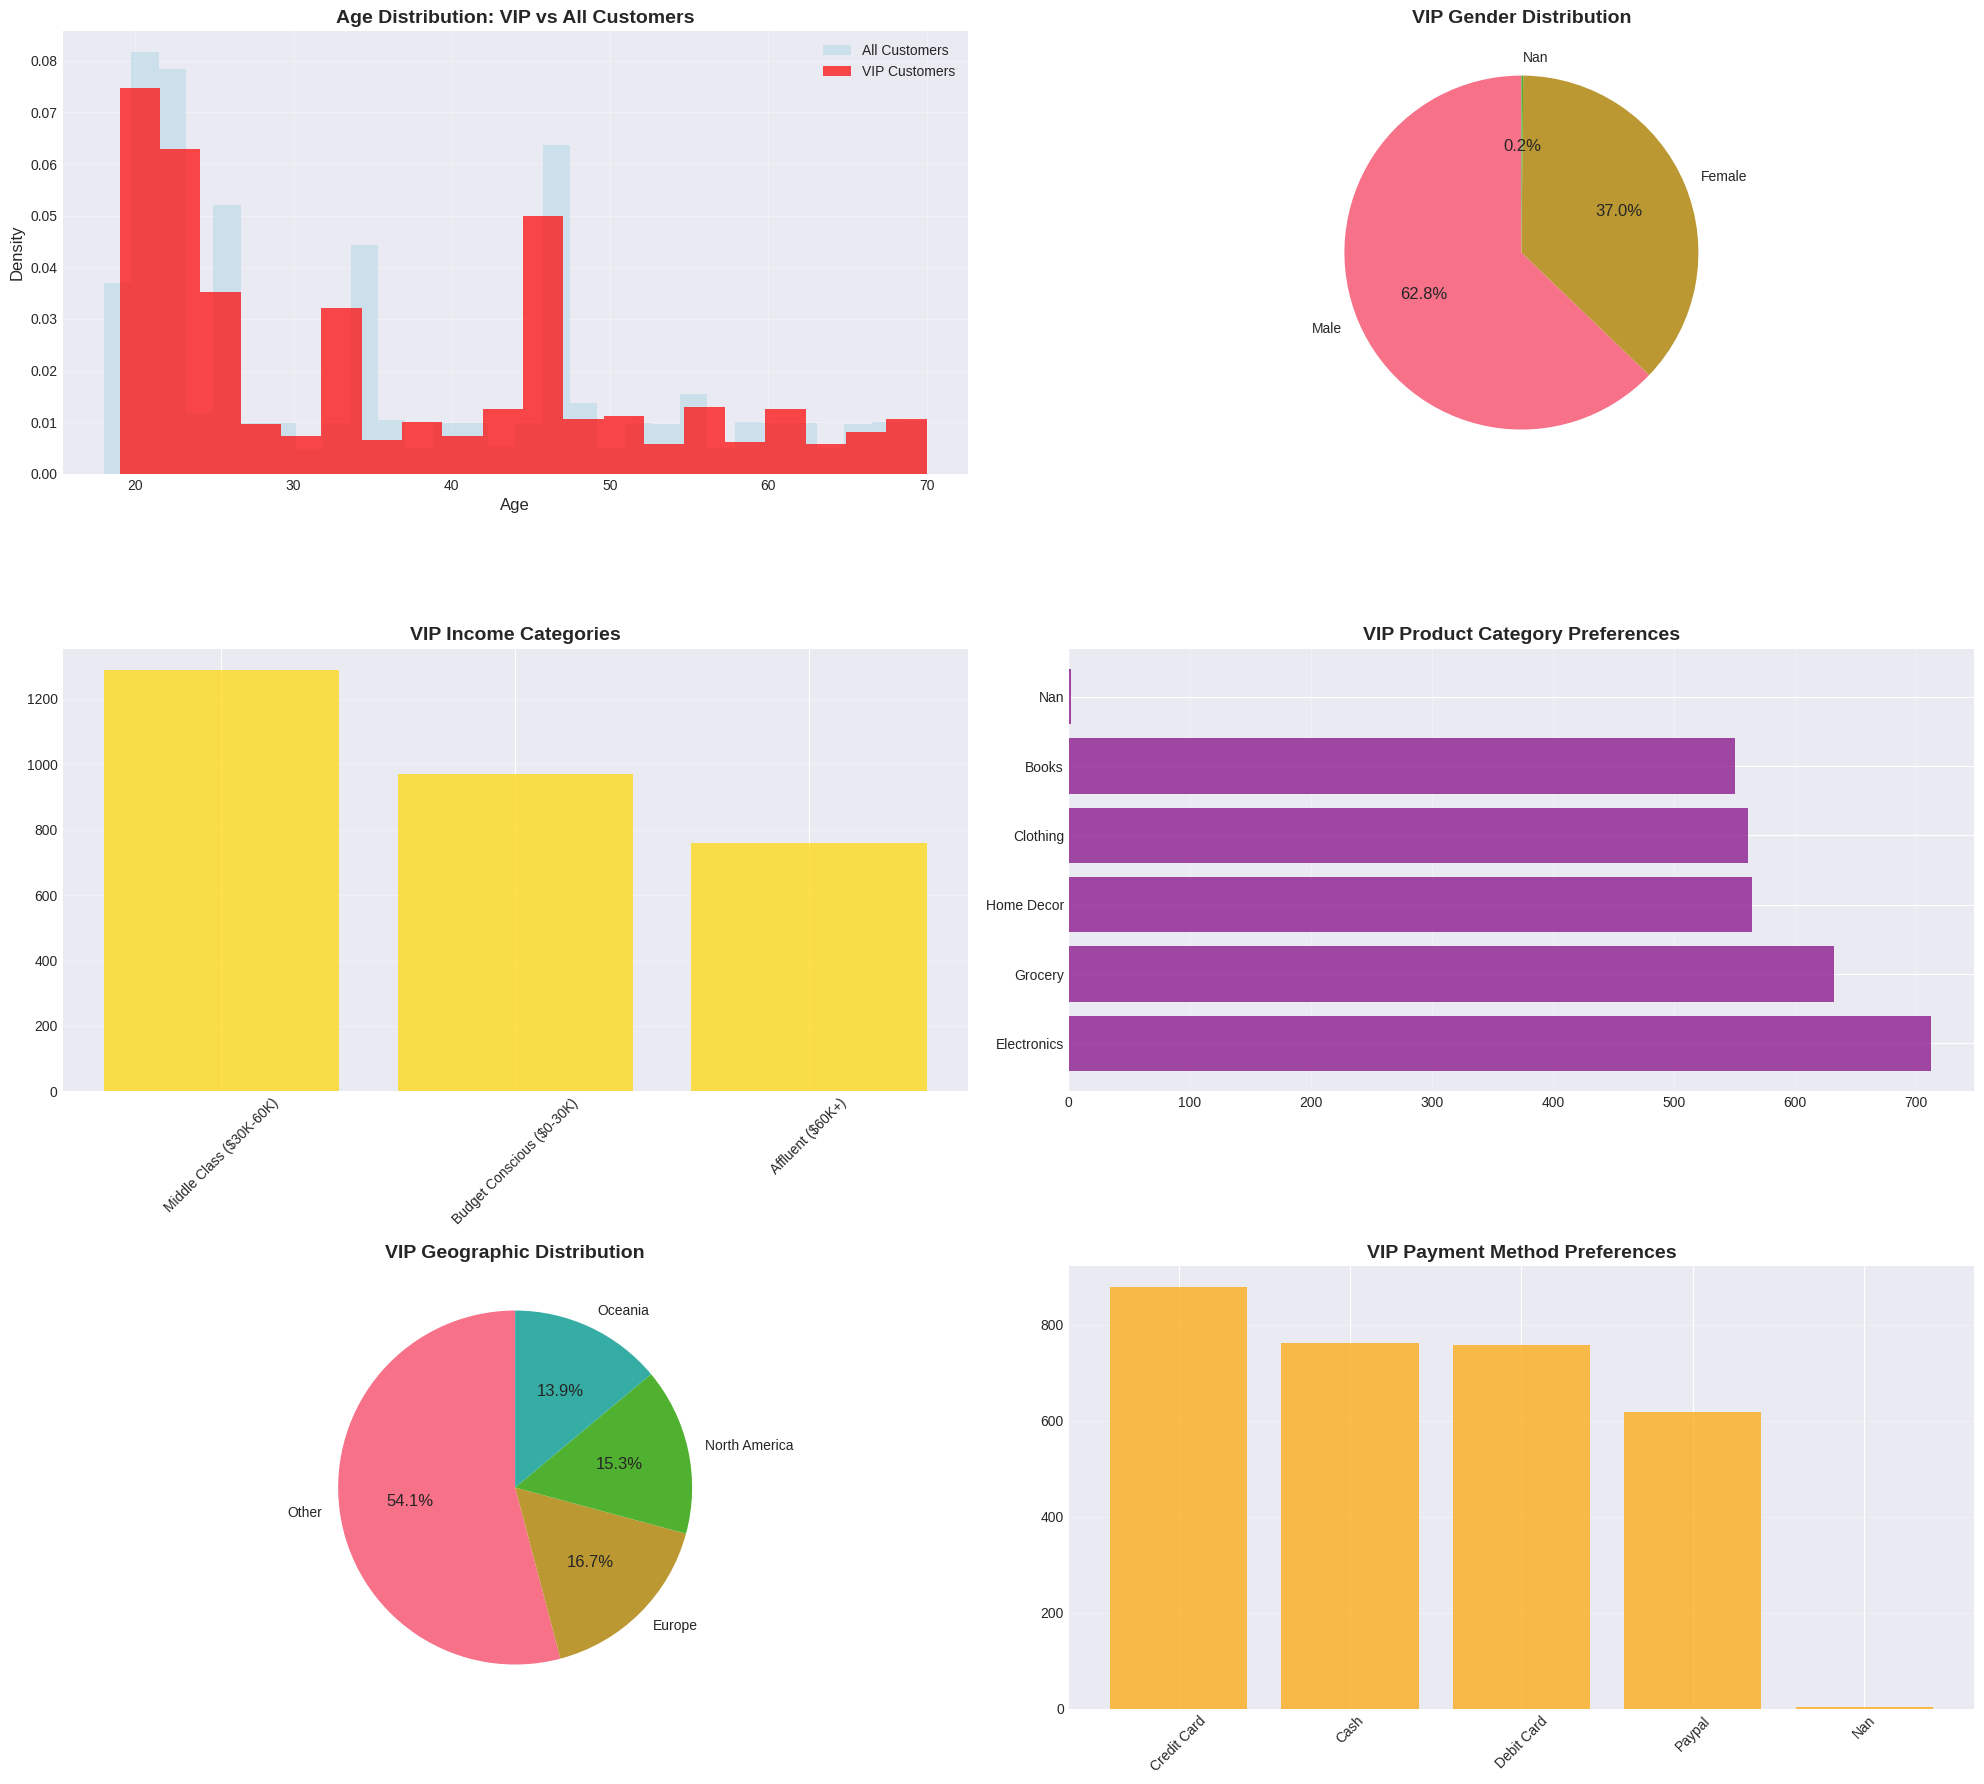


 VIP vs REGULAR CUSTOMER COMPARISON:
---------------------------------------------


,Average Age,Average Purchases,Average Spend,Average Rating,Avg Revenue per Purchase
Regular (95%),35.44,5.15,1219.57,3.16,245.14
Premium (5%),36.18,9.35,4180.92,3.16,448.68
VIP (1%),35.78,9.97,4737.49,3.18,475.30



 VIP BEHAVIORAL INSIGHTS:
-----------------------------------
 Top VIP Category: Electronics (23.6%)
 Top VIP Brand: Pepsi (287 purchases)
 Preferred VIP Shipping: Same-Day (1071 customers)
 VIP Geographic Hub: Other (54.1%)

 REVENUE CONCENTRATION ANALYSIS:
----------------------------------------
Top 1% Revenue Share: 3.5%
Top 5% Revenue Share: 15.3%
Top 10% Revenue Share: 27.6%

 TOP 10 VIP CUSTOMERS:
-------------------------


,Total_Amount,Total_Purchases,Revenue_Per_Purchase,Age
Customer_ID,,,,
16696.0,4999.625796,10.0,499.962580,19.0
23578.0,4999.340097,10.0,499.934010,23.0
80039.0,4999.171428,10.0,499.917143,46.0
14409.0,4998.723479,10.0,499.872348,26.0
67425.0,4998.603558,10.0,499.860356,34.0
37855.0,4998.473906,10.0,499.847391,20.0
87684.0,4998.306569,10.0,499.830657,27.0
14994.0,4998.204389,10.0,499.820439,22.0
10139.0,4997.986042,10.0,499.798604,69.0



 STRATEGIC VIP INSIGHTS:
 Pareto Principle Check: 1.0% of customers generate 3.5% of revenue
 BALANCED: Revenue is well-distributed across customer base
 VIPs are older on average (+0.3 years)
 VIP Loyalty Factor: 1.9x more purchases than regular customers


In [27]:
# High-Value Customer Analysis (Top 1% Spenders)
print("VIP CUSTOMER INTELLIGENCE - TOP 1% ANALYSIS")
print("=" * 50)

# Identify top 1% customers by total spending
spending_threshold_99 = df_clean['Total_Amount'].quantile(0.99)
spending_threshold_95 = df_clean['Total_Amount'].quantile(0.95)

# Extract VIP customers (top 1%)
vip_customers = df_clean[df_clean['Total_Amount'] >= spending_threshold_99].copy()
premium_customers = df_clean[df_clean['Total_Amount'] >= spending_threshold_95].copy()

print(f"VIP Threshold (Top 1%): ${spending_threshold_99:,.2f}")
print(f"Premium Threshold (Top 5%): ${spending_threshold_95:,.2f}")
print(f"VIP Customers: {len(vip_customers):,} ({len(vip_customers)/len(df_clean)*100:.2f}%)")
print(f"Premium Customers: {len(premium_customers):,} ({len(premium_customers)/len(df_clean)*100:.2f}%)")

# VIP Customer Profile Analysis
vip_profile = {
    'Total VIP Customers': len(vip_customers),
    'Total VIP Revenue': vip_customers['Total_Amount'].sum(),
    'Average VIP Spend': vip_customers['Total_Amount'].mean(),
    'VIP Revenue Share': (vip_customers['Total_Amount'].sum() / df_clean['Total_Amount'].sum()) * 100,
    'Average Age': vip_customers['Age'].mean(),
    'Average Purchases': vip_customers['Total_Purchases'].mean(),
    'Average Rating': vip_customers['Ratings'].mean()
}

print(f"\nVIP CUSTOMER PROFILE:")
print("-" * 30)
for key, value in vip_profile.items():
    if 'Revenue' in key or 'Spend' in key:
        print(f"{key}: ${value:,.0f}")
    elif 'Share' in key or 'Age' in key or 'Rating' in key:
        print(f"{key}: {value:.1f}")
    else:
        print(f"{key}: {value:,}")

# VIP Demographics Analysis
fig, axes = plt.subplots(3, 2, figsize=(20, 18))

# Age distribution comparison
axes[0,0].hist(df_clean['Age'], bins=30, alpha=0.5, label='All Customers', color='lightblue', density=True)
axes[0,0].hist(vip_customers['Age'], bins=20, alpha=0.7, label='VIP Customers', color='red', density=True)
axes[0,0].set_title('Age Distribution: VIP vs All Customers', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Gender distribution for VIPs
if 'Gender' in vip_customers.columns:
    vip_gender = vip_customers['Gender'].value_counts()
    axes[0,1].pie(vip_gender.values, labels=vip_gender.index, autopct='%1.1f%%', startangle=90)
    axes[0,1].set_title('VIP Gender Distribution', fontsize=14, fontweight='bold')

# Income category for VIPs
if 'Income_Category' in vip_customers.columns:
    vip_income = vip_customers['Income_Category'].value_counts()
    axes[1,0].bar(vip_income.index, vip_income.values, color='gold', alpha=0.7)
    axes[1,0].set_title('VIP Income Categories', fontsize=14, fontweight='bold')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(True, alpha=0.3, axis='y')

# VIP Product Category Preferences
if 'Product_Category' in vip_customers.columns:
    vip_categories = vip_customers['Product_Category'].value_counts().head(8)
    axes[1,1].barh(vip_categories.index, vip_categories.values, color='purple', alpha=0.7)
    axes[1,1].set_title('VIP Product Category Preferences', fontsize=14, fontweight='bold')
    axes[1,1].grid(True, alpha=0.3, axis='x')

# VIP Geographic Distribution
if 'Region' in vip_customers.columns:
    vip_regions = vip_customers['Region'].value_counts()
    axes[2,0].pie(vip_regions.values, labels=vip_regions.index, autopct='%1.1f%%', startangle=90)
    axes[2,0].set_title('VIP Geographic Distribution', fontsize=14, fontweight='bold')

# VIP Payment Method Preferences
if 'Payment_Method' in vip_customers.columns:
    vip_payment = vip_customers['Payment_Method'].value_counts()
    axes[2,1].bar(vip_payment.index, vip_payment.values, color='orange', alpha=0.7)
    axes[2,1].set_title('VIP Payment Method Preferences', fontsize=14, fontweight='bold')
    axes[2,1].tick_params(axis='x', rotation=45)
    axes[2,1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# VIP vs Regular Customer Comparison
print(f"\n VIP vs REGULAR CUSTOMER COMPARISON:")
print("-" * 45)

regular_customers = df_clean[df_clean['Total_Amount'] < spending_threshold_95]

comparison_metrics = {
    'Average Age': [regular_customers['Age'].mean(), premium_customers['Age'].mean(), vip_customers['Age'].mean()],
    'Average Purchases': [regular_customers['Total_Purchases'].mean(), premium_customers['Total_Purchases'].mean(), vip_customers['Total_Purchases'].mean()],
    'Average Spend': [regular_customers['Total_Amount'].mean(), premium_customers['Total_Amount'].mean(), vip_customers['Total_Amount'].mean()],
    'Average Rating': [regular_customers['Ratings'].mean(), premium_customers['Ratings'].mean(), vip_customers['Ratings'].mean()],
    'Avg Revenue per Purchase': [regular_customers['Revenue_Per_Purchase'].mean(), premium_customers['Revenue_Per_Purchase'].mean(), vip_customers['Revenue_Per_Purchase'].mean()]
}

comparison_df = pd.DataFrame(comparison_metrics, index=['Regular (95%)', 'Premium (5%)', 'VIP (1%)']).round(2)
display(comparison_df)

# VIP Behavioral Insights
print(f"\n VIP BEHAVIORAL INSIGHTS:")
print("-" * 35)

# Most popular VIP product categories
if 'Product_Category' in vip_customers.columns:
    top_vip_category = vip_customers['Product_Category'].value_counts().index[0]
    vip_category_percentage = (vip_customers['Product_Category'].value_counts().iloc[0] / len(vip_customers)) * 100
    print(f" Top VIP Category: {top_vip_category} ({vip_category_percentage:.1f}%)")

# VIP brand preferences
if 'Product_Brand' in vip_customers.columns:
    top_vip_brand = vip_customers['Product_Brand'].value_counts().index[0]
    vip_brand_count = vip_customers['Product_Brand'].value_counts().iloc[0]
    print(f" Top VIP Brand: {top_vip_brand} ({vip_brand_count} purchases)")

# VIP shipping preferences
if 'Shipping_Method' in vip_customers.columns:
    vip_shipping = vip_customers['Shipping_Method'].value_counts()
    top_vip_shipping = vip_shipping.index[0]
    print(f" Preferred VIP Shipping: {top_vip_shipping} ({vip_shipping.iloc[0]} customers)")

# VIP geographic concentration
if 'Region' in vip_customers.columns:
    vip_region_concentration = vip_customers['Region'].value_counts()
    top_vip_region = vip_region_concentration.index[0]
    vip_region_percentage = (vip_region_concentration.iloc[0] / len(vip_customers)) * 100
    print(f" VIP Geographic Hub: {top_vip_region} ({vip_region_percentage:.1f}%)")

# Revenue concentration analysis
print(f"\n REVENUE CONCENTRATION ANALYSIS:")
print("-" * 40)

revenue_concentration = {
    'Top 1% Revenue Share': (vip_customers['Total_Amount'].sum() / df_clean['Total_Amount'].sum()) * 100,
    'Top 5% Revenue Share': (premium_customers['Total_Amount'].sum() / df_clean['Total_Amount'].sum()) * 100,
    'Top 10% Revenue Share': (df_clean[df_clean['Total_Amount'] >= df_clean['Total_Amount'].quantile(0.9)]['Total_Amount'].sum() / df_clean['Total_Amount'].sum()) * 100
}

for metric, value in revenue_concentration.items():
    print(f"{metric}: {value:.1f}%")

# VIP Customer Lifetime Value Analysis
vip_clv_analysis = vip_customers.groupby('Customer_ID').agg({
    'Total_Amount': 'first',
    'Total_Purchases': 'first',
    'Revenue_Per_Purchase': 'first',
    'Age': 'first'
}).sort_values('Total_Amount', ascending=False)

print(f"\n TOP 10 VIP CUSTOMERS:")
print("-" * 25)
display(vip_clv_analysis.head(10))

# Strategic VIP Insights
print(f"\n STRATEGIC VIP INSIGHTS:")
print("=" * 35)

# VIP customer concentration
vip_concentration = len(vip_customers) / len(df_clean) * 100
vip_revenue_impact = vip_profile['VIP Revenue Share']

print(f" Pareto Principle Check: {vip_concentration:.1f}% of customers generate {vip_revenue_impact:.1f}% of revenue")

if vip_revenue_impact > 20:
    print(f" HIGH CONCENTRATION: VIPs are critical for business success!")
else:
    print(f" BALANCED: Revenue is well-distributed across customer base")

# VIP age insights
vip_avg_age = vip_customers['Age'].mean()
regular_avg_age = regular_customers['Age'].mean()

if vip_avg_age > regular_avg_age:
    print(f" VIPs are older on average (+{vip_avg_age - regular_avg_age:.1f} years)")
else:
    print(f" VIPs are younger on average (-{regular_avg_age - vip_avg_age:.1f} years)")

# VIP loyalty
vip_avg_purchases = vip_customers['Total_Purchases'].mean()
regular_avg_purchases = regular_customers['Total_Purchases'].mean()
vip_loyalty_multiplier = vip_avg_purchases / regular_avg_purchases

print(f" VIP Loyalty Factor: {vip_loyalty_multiplier:.1f}x more purchases than regular customers")

## 🎯  Summary

In [28]:
# Executive Summary Generation
print("GENERATING EXECUTIVE SUMMARY & STRATEGIC RECOMMENDATIONS")
print("=" * 65)

# Calculate final key metrics for executive summary
executive_metrics = {}

# Basic metrics
executive_metrics['total_customers'] = len(df_clean['Customer_ID'].unique())
executive_metrics['total_revenue'] = df_clean['Total_Amount'].sum()
executive_metrics['avg_customer_value'] = df_clean['Total_Amount'].mean()
executive_metrics['avg_order_value'] = df_clean['Amount'].mean()

# Customer segmentation insights
if 'Spending_Behavior' in df_clean.columns:
    executive_metrics['top_segment'] = df_clean['Spending_Behavior'].value_counts().index[0]
    executive_metrics['top_segment_percentage'] = (df_clean['Spending_Behavior'].value_counts().iloc[0] / len(df_clean)) * 100

# Product insights
if 'Product_Category' in df_clean.columns:
    executive_metrics['top_category'] = df_clean['Product_Category'].value_counts().index[0]
    category_revenue = df_clean.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False)
    executive_metrics['top_category_revenue'] = category_revenue.iloc[0]
    executive_metrics['category_concentration'] = (category_revenue.iloc[0] / category_revenue.sum()) * 100

# VIP customer insights (if calculated earlier)
if 'vip_customers' in locals():
    executive_metrics['vip_count'] = len(vip_customers)
    executive_metrics['vip_revenue_share'] = (vip_customers['Total_Amount'].sum() / df_clean['Total_Amount'].sum()) * 100
    executive_metrics['vip_percentage'] = (len(vip_customers) / len(df_clean)) * 100

# Operational metrics
if 'Order_Status' in df_clean.columns:
    delivered_orders = (df_clean['Order_Status'] == 'Delivered').sum()
    total_orders = len(df_clean)
    executive_metrics['fulfillment_rate'] = (delivered_orders / total_orders) * 100

# Customer satisfaction
executive_metrics['avg_rating'] = df_clean['Ratings'].mean()
executive_metrics['high_rating_percentage'] = (df_clean['Ratings'] >= 4.0).mean() * 100

print("EXECUTIVE METRICS CALCULATED:")
print("-" * 35)
for key, value in executive_metrics.items():
    if isinstance(value, (int, float)):
        if 'revenue' in key.lower() or 'value' in key.lower():
            print(f" {key}: ${value:,.0f}")
        elif 'percentage' in key.lower() or 'rate' in key.lower():
            print(f" {key}: {value:.1f}%")
        elif 'rating' in key.lower():
            print(f" {key}: {value:.2f}")
        else:
            print(f" {key}: {value:,.0f}")
    else:
        print(f" {key}: {value}")

GENERATING EXECUTIVE SUMMARY & STRATEGIC RECOMMENDATIONS
EXECUTIVE METRICS CALCULATED:
-----------------------------------
 total_customers: 86,767
 total_revenue: $413,037,195
 avg_customer_value: $1,368
 avg_order_value: $255
 top_segment: Light Spender
 top_segment_percentage: 25.0%
 top_category: Electronics
 top_category_revenue: $97,535,083
 category_concentration: 24
 vip_count: 3,021
 vip_revenue_share: $3
 vip_percentage: 1.0%
 fulfillment_rate: 43.2%
 avg_rating: 3.16
 high_rating_percentage: 49.1%
